#  Topic: Bank Customer Attrition Prediction  

##### By: Tan Wai Ting
---

### Table of Contents 

1. Problem Statement
2. Objectives
3. Data Loading
4. Data Dictionary
5. Initial Data Exploration
6. Exploratory Data Analysis
    - Target Variable: 'Exited'
    - Features
    - Findings
7. Data Preprocessing
8. Model Training
   - Baseline Model
   - Other Models
9. Insights & Recommendations
10. Conclusion
11. End of Analysis

### Problem Statement 

In today's competitive banking landscape, customer retention is a key challenge. Banks invest significant resources in acquiring new customers, but retaining existing ones is just as crucial for long-term profitability. Understanding why customers leave and predicting those at risk can help financial institutions take proactive measures to improve customer satisfaction and reduce attrition.

### Objectives

1. We will identify key factors that contribute to customer attrition. The analysis on customer data and attrition patterns will provide actionable insights on the areas for improvement to help bank improve retention strategies.
2. We will build model that predicts customer attrition by classifying customers as "likely to exit" or "likely to stay" enabling the bank to take preemptive actions to retain valuable customers.

### Data Loading

Dataset for Bank Customer Attrition Insights extracted from 
https://www.kaggle.com/datasets/marusagar/bank-customer-attrition-insights/data.

In [1]:
# Import the libraries 

# To connect to and interact for database operations

import sqlite3

# For data analysis

import pandas as pd
from pandas.api.types import CategoricalDtype

# For data visualization

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.patches as mpatches
import seaborn as sns

# For statistical significance

from scipy.stats import chi2_contingency

# For modeling 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [2]:
# Create a new sqlite database file 

# sqlite is a database based on files, file-based database, useful for small on-device data storage 

con = sqlite3.connect('test_db.db')

In [3]:
# Read the data file 

bank_customer_info = pd.read_csv('./Bank-Customer-Attrition-Insights-Data.csv') 

In [4]:
# Store the DataFrame in the test_db database

bank_customer_info.to_sql(name='bank_customer_info',con=con, index=False, if_exists='replace')

10000

In [5]:
# Execute SQL from Pandas 

sql_query = '''
SELECT * 
FROM bank_customer_info
'''
pd.read_sql(sql_query,con)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15598695,Fields,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15649354,Johnston,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15737556,Vasilyev,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15671610,Hooper,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15625092,Colombo,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15583480,Morgan,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15620341,Nwebube,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15613886,Trevisan,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15792916,Ositadimma,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


In [6]:
# Check the type 

type(bank_customer_info)

pandas.core.frame.DataFrame

In [7]:
# Print the columns name  

bank_customer_info.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')

### Data Dictionary

Target Variable: 

| name | description |
| ---    | --- |
| Exited | "Exited" column indicates whether a customer has left the bank (1) or remained (0).  

Features (Financial): 

| name | description |
| ---    | --- |
| CreditScore | "CreditScore" defines the credit history of the customer.  
| Balance | "Balance" column reflects the amount of money a customer holds in their bank account. 
| EstimatedSalary | "EstimatedSalary" represents the customer’s estimated annual salary. 
| Card Type | "Card Type" refers to the type of credit card a customer holds, such as a standard, premium, or rewards card. 
| Point Earned | "Point Earned" shows the loyalty points a customer has accumulated through the use of their credit card. 

Features (Demographic): 

| name | description |
| ---    | --- |
| Geography | "Geography" refers to the geographical location of the customer. 
| Gender | "Gender" defines the gender of the customer.  
| Age | "Age" is the age of the customer. 

Features (Behavioral): 

| name | description |
| ---    | --- |
| Tenure | "Tenure" refers to the number of years a customer has been with the bank. 
| NumOfProducts | "NumOfProducts" refers to the number of products (e.g., savings accounts, loans, credit cards) that a customer has with the bank. 
| HasCrCard | "HasCrCard" indicates whether or not a customer holds a credit card with the bank. 
| IsActiveMember | "IsActiveMember" column indicates whether a customer actively engages with the bank's services. 
| Complain | "Complain" column shows whether or not a customer has filed a complaint with the bank. 
| Satisfaction Score | "Satisfaction Score" represents how satisfied a customer is with the bank's complaint resolution process. 

Features (Others): 

| name | description |
| ---    | --- |
| RowNumber | "RowNumber" column corresponds to the unique record number for each customer entry. 
| CustomerId | "CustomerId" column consists of randomly generated identifiers for each customer. 
| Surname | "Surname" column holds the last names of customers. 

Features (Added): 

| name | description |
| ---    | --- |
| CreditScoreCategory | "CreditScore" values that are segmented into bins and assigned to numeric labels. 1 = 350-500, 2 = 501-650, 3 = 651-750, 4 = 751-850.
| CreditScoreCategoryLabel | "CreditScoreCategory" values that are assigned to labels. Low = 1, Mid = 2, High = 3, Very High = 4.
| HasBalance | "Balance" values that are converted into bins of whether customer holds balance in their bank account and assigned to numeric labels. 0 = No Balance, 1 = Have Balance.
| BalanceEstSalaryRatio | "BalanceEstSalaryRatio" indicate how financially engaged the customer is with the bank.
| AgeCategoryLabel | "Age" values that are segmented into bins and then assigned to labels. 18-29, 30-39, 40-49, 50-59, 60-69, 70-79, 80+.
| AgeCategory | "AgeCategoryLabel" values that are assigned to numeric labels. 1 = 18-29, 2 = 30-39, 3 = 40-49, 4 = 50-59, 5 = 60-69, 6 = 70-79, 7 = 80+.
| TenureCategory | "Tenure" values that are segmented into bins and then assigned to numeric labels. 1 = 0-2, 2 = 3-7, 3 = 8-10.
| BalPerProduct | "BalPerProduct" indicate how much balance the customer holds on average per product they own.
| EstSalaryToProductRatio | "EstSalaryToProductRatio" shows the affordability of products.
| ActiveBalance | "ActiveBalance" capture active customers with high balances. 

### Initial Data Exploration

In [8]:
# To check the number of rows and columns of the dataset 

print(f"There are {bank_customer_info.shape[0]} rows and {bank_customer_info.shape[1]} columns.") 

There are 10000 rows and 18 columns.


In [9]:
# Preview the first 5 rows of the data using the head method 

bank_customer_info.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15598695,Fields,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15649354,Johnston,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15737556,Vasilyev,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15671610,Hooper,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15625092,Colombo,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [10]:
# Print the information about the dataset

# To check the data type of the columns in the dataset 

bank_customer_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [11]:
# Check for duplicate values in columns like 'RowNumber' and 'CustomerId'

# Assuming that values in all other columns can naturally repeat across rows and duplicate entries are expected

duplicates = bank_customer_info[['RowNumber', 'CustomerId']].duplicated() # .duplicated() returns a boolean series
duplicates.any() # .any() checks whether any true value exists in the boolean series 

np.False_

In [12]:
# Check for missing values

print("\nMissing values in dataset:")
print(bank_customer_info.isnull().sum())


Missing values in dataset:
RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64


In [13]:
# To get unique values for the columns 

unique_values = {
    "Geography": bank_customer_info['Geography'].unique(),
    "Gender": bank_customer_info['Gender'].unique(),
    "Age": bank_customer_info['Age'].unique(),
    "Tenure": bank_customer_info['Tenure'].unique(),
    "NumOfProducts": bank_customer_info['NumOfProducts'].unique(),
    "Satisfaction Score": bank_customer_info['Satisfaction Score'].unique(),
    "Card Type": bank_customer_info['Card Type'].unique(),
}

# Then print the unique values for each column

for column, values in unique_values.items():
    print(f"Unique values for {column}:")
    print(values)
    print()

Unique values for Geography:
['France' 'Spain' 'Germany']

Unique values for Gender:
['Female' 'Male']

Unique values for Age:
[42 41 39 43 44 50 29 27 31 24 34 25 35 45 58 32 38 46 36 33 40 51 61 49
 37 19 66 56 26 21 55 75 22 30 28 65 48 52 57 73 47 54 72 20 67 79 62 53
 80 59 68 23 60 70 63 64 18 82 69 74 71 76 77 88 85 84 78 81 92 83]

Unique values for Tenure:
[ 2  1  8  7  4  6  3 10  5  9  0]

Unique values for NumOfProducts:
[1 3 2 4]

Unique values for Satisfaction Score:
[2 3 5 4 1]

Unique values for Card Type:
['DIAMOND' 'GOLD' 'SILVER' 'PLATINUM']



In [14]:
# Access the summary statistics using the describe method 

# To understand the min, max, mean for 'CreditScore', 'Balance', 'EstimatedSalary', 'Point Earned'

bank_customer_info.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


### Exploratory Data Analysis

#### Target Variable: 'Exited'

1. Existing customers will be termed as Retention (0)
2. Customers who left the bank will be termed as Attrition (1) 

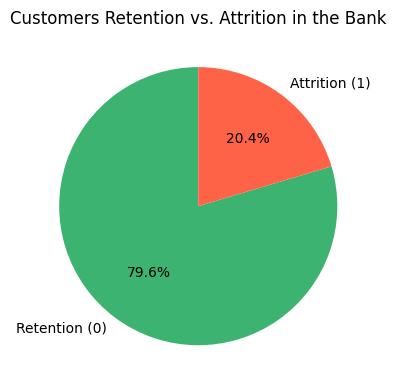

In [15]:
# To start off by looking at the Target Variable 'Exited' 

# Plot a pie chart to visualize Retention vs Attrition

insight1 = bank_customer_info['Exited'].value_counts() 
# value_counts() function in pandas is used to count the unique values in a column and returns how often each value appears
labels = ['Retention (0)', 'Attrition (1)']
plt.figure(figsize=(8,4))
plt.pie(insight1, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#3CB371', '#FF6347']) # Green, Red 
plt.title('Customers Retention vs. Attrition in the Bank')
plt.tight_layout()
plt.show()

#### Features 

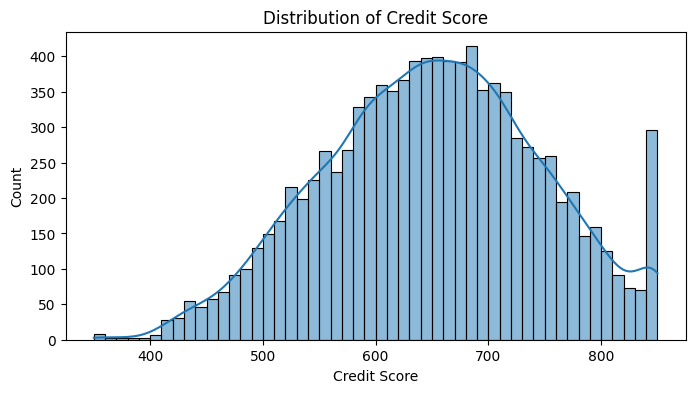

In [16]:
# Exploring the other Features 

# Creating histogram to visualize the distribution of 'CreditScore'

plt.figure(figsize=(8,4))
sns.histplot(bank_customer_info['CreditScore'], bins=50, kde=True)
plt.title('Distribution of Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Count')
plt.show()

In [17]:
# It shows a normal distribution except for the credit score with a sudden peak which may appear as data error or an outlier 

# To check for the value that falls under the outlier 

# Using the filter method to get the customers with credit score of above 800 

insight2 = bank_customer_info[bank_customer_info['CreditScore'] > 800]

# Count the number of customers in each 'CreditScore' that is from 800 

insight3 = insight2['CreditScore'].value_counts() # Display the result of the credit score with the highest bar 

# Then we want to count the number of customers by 'CreditScore'

for creditscore, count in insight3.items():
    print(f"{creditscore} {count}")

850 233
807 19
809 15
803 15
806 15
802 14
811 13
835 12
812 12
841 12
805 12
815 11
814 11
834 11
813 11
828 10
808 10
817 9
833 9
838 8
825 8
821 8
820 8
849 8
837 8
829 8
804 8
844 7
826 7
801 7
824 7
823 7
842 7
816 6
832 6
810 6
845 6
818 6
847 6
831 6
819 6
848 5
836 5
846 5
827 5
840 5
822 5
839 3
843 2
830 2


In [18]:
# From the initial data exploration, it is noted that there are no missing or duplicate 'CustomerId' 

# To check if the 233 customers are different in terms of other features such as 'Age', 'Tenure', 'Balance', 'Exited' 

print(bank_customer_info[bank_customer_info['CreditScore'] == 850])

# We will keep the data of 'CreditScore' and later create bins for 'CreditScore' to prevent bias 

      RowNumber  CustomerId       Surname  CreditScore Geography  Gender  Age  \
4             5    15625092       Colombo          850     Spain  Female   43   
38           39    15589230            Wu          850    France    Male   36   
180         181    15799720        Coburn          850     Spain  Female   45   
200         201    15641298       Corones          850     Spain    Male   30   
223         224    15624695  Otitodilinna          850    France    Male   33   
...         ...         ...           ...          ...       ...     ...  ...   
9581       9582    15746127          Hort          850    France  Female   28   
9646       9647    15665008       Sidorov          850     Spain    Male   71   
9688       9689    15669606           Chu          850    France    Male   68   
9931       9932    15772341         Hs?eh          850    France  Female   34   
9949       9950    15786717            He          850    France  Female   47   

      Tenure    Balance  Nu

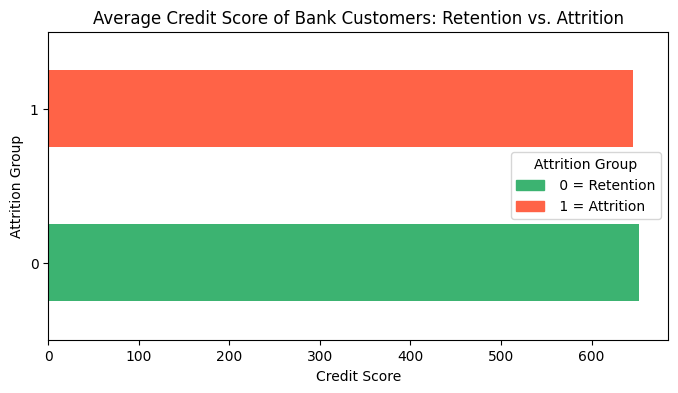

In [19]:
# Compare average 'CreditScore' for Retention vs Attrition 

colors = ['#3CB371', '#FF6347'] # Green for Retention (0), Red for Attrition (1)
plt.figure(figsize=(8,4))
insight4 = bank_customer_info.groupby('Exited')['CreditScore'].mean().plot(kind='barh', color=colors)
plt.xlabel('Credit Score')
plt.ylabel('Attrition Group')
plt.title('Average Credit Score of Bank Customers: Retention vs. Attrition')
green_patch = mpatches.Patch(color='#3CB371', label=' 0 = Retention') # Manually create legend handles
red_patch = mpatches.Patch(color='#FF6347', label=' 1 = Attrition') 
plt.legend(handles=[green_patch, red_patch], title='Attrition Group') # Add the legend 
plt.show()

In [20]:
# Similar average credit score is noticed between the two attrition group 

# Put 'CreditScore' into bins and assign numeric labels using the function method 

def creditscore_category(score):
    if 350 <= score <= 500:
        return 1 # Low
    elif 501 <= score <= 650: 
        return 2 # Mid
    elif 651 <= score <= 750: 
        return 3 # High
    elif 751 <= score <= 850: 
        return 4 # Very High 
    else: 
        return 0

# Apply the function to create a new column to show the 'CreditScore' with bin number  

bank_customer_info['CreditScoreCategory'] = bank_customer_info['CreditScore'].apply(creditscore_category)

# Print the DataFrame

bank_customer_info

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned,CreditScoreCategory
0,1,15598695,Fields,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464,2
1,2,15649354,Johnston,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456,2
2,3,15737556,Vasilyev,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377,2
3,4,15671610,Hooper,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350,3
4,5,15625092,Colombo,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15583480,Morgan,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300,4
9996,9997,15620341,Nwebube,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771,2
9997,9998,15613886,Trevisan,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564,3
9998,9999,15792916,Ositadimma,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339,4


Features (Added): 

| name | description |
| ---    | --- |
| CreditScoreCategory | "CreditScore" values that are segmented into bins and assigned to numeric labels. 1 = 350-500, 2 = 501-650, 3 = 651-750, 4 = 751-850.

In [21]:
# Check the data type of the 'CreditScoreCategory' column

bank_customer_info['CreditScoreCategory'].dtype

dtype('int64')

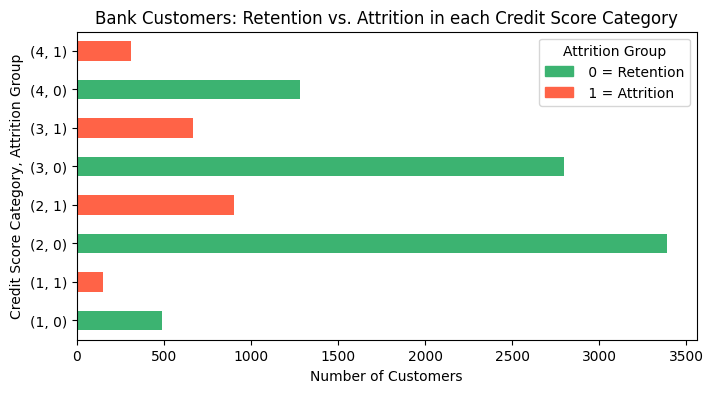

In [22]:
# Compare the Retention vs Attrition of 'CreditScoreCategory'   

colors = ['#3CB371', '#FF6347'] 
plt.figure(figsize=(8,4))
insight5 = bank_customer_info.groupby('CreditScoreCategory')['Exited'].value_counts().plot(kind='barh', color=colors)
plt.xlabel('Number of Customers')
plt.ylabel('Credit Score Category, Attrition Group')
plt.title('Bank Customers: Retention vs. Attrition in each Credit Score Category')  
green_patch = mpatches.Patch(color='#3CB371', label=' 0 = Retention') 
red_patch = mpatches.Patch(color='#FF6347', label=' 1 = Attrition') 
plt.legend(handles=[green_patch, red_patch], title='Attrition Group') 
plt.show()

/var/folders/bv/ycf3qx6d7hg1dyfy3547zgl80000gn/T/ipykernel_12598/3031210913.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  insight6 = bank_customer_info.groupby(['CreditScoreCategoryLabel', 'Exited']).size().unstack(fill_value=0)


<Figure size 800x400 with 0 Axes>

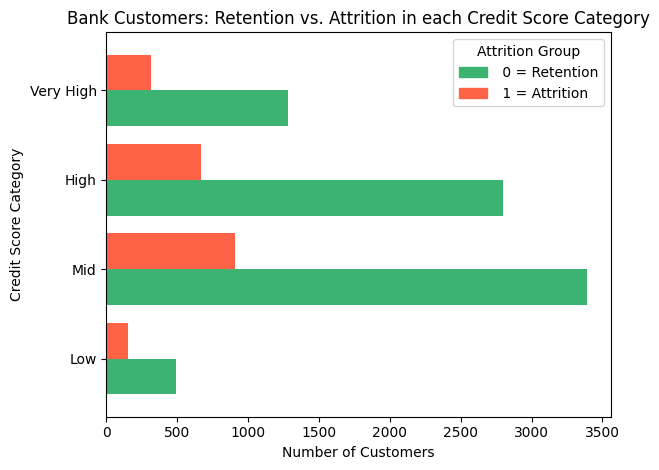

In [23]:
# Visualize the number of existing customers vs those who left the bank in each 'CreditScoreCategory' in a bar chart with text labels 

# Map the numeric labels to the corresponding text labels

creditscorecategory_labels = {1: 'Low', 2: 'Mid', 3: 'High', 4: 'Very High'} 

# Apply the mapping to the 'CreditScoreCategory' column

bank_customer_info['CreditScoreCategoryLabel'] = bank_customer_info['CreditScoreCategory'].map(creditscorecategory_labels)

creditscorecategory_order = ['Low', 'Mid', 'High', 'Very High']
bank_customer_info['CreditScoreCategoryLabel'] = pd.Categorical(bank_customer_info['CreditScoreCategoryLabel'], 
                                                                categories=creditscorecategory_order, ordered=True)
insight6 = bank_customer_info.groupby(['CreditScoreCategoryLabel', 'Exited']).size().unstack(fill_value=0)
colors = ['#3CB371', '#FF6347']  
plt.figure(figsize=(8,4))
insight6.plot(kind='barh', color=colors, width=0.8)
plt.xlabel('Number of Customers')
plt.ylabel('Credit Score Category')
plt.title('Bank Customers: Retention vs. Attrition in each Credit Score Category') 
green_patch = mpatches.Patch(color='#3CB371', label=' 0 = Retention')  # Label for existing customers
red_patch = mpatches.Patch(color='#FF6347', label=' 1 = Attrition')  # Label for customers who left
plt.legend(handles=[green_patch, red_patch], title='Attrition Group') 
plt.tight_layout()
plt.show()

Analysis:  

Lower credit scores are actually seen to be associated with lower attrition.  
This does not indicate that customers with lower creditworthiness are less loyal or more likely to discontinue services.  
For customers who have left, 'Mid' level CreditScoreCategory shows a highest proportion.  
This could indicate that this segment is at a higher risk of attrition.  

Features (Added): 

| name | description |
| ---    | --- |
| CreditScoreCategoryLabel | "CreditScoreCategory" values that are assigned to labels. Low = 1, Mid = 2, High = 3, Very High = 4.

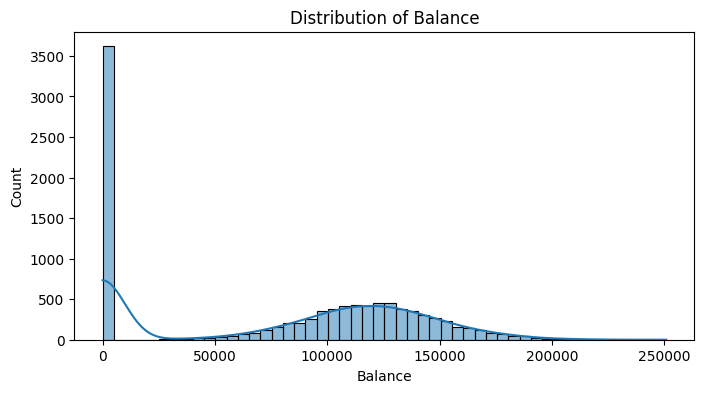

In [24]:
# Creating histogram to visualize the distribution of 'Balance'

plt.figure(figsize=(8,4))
sns.histplot(bank_customer_info['Balance'], bins=50, kde=True)
plt.title('Distribution of Balance')
plt.xlabel('Balance')
plt.ylabel('Count')
plt.show()

In [25]:
# To count the total number of rows of customers with 'Balance' of 0

bank_customer_info[bank_customer_info['Balance'] == 0].shape[0] 

3617

In [26]:
# Find out the classification of customers who are holding an account 'Balance' of 0 

# Whether they are existing customers or those who left the bank 

insight7 = bank_customer_info[bank_customer_info['Balance'] == 0]['Exited'].replace({0: 'Retention', 1: 'Attrition'}).value_counts() 
# We need to replace the values in the Exited column first before calling .value_counts() 
# Otherwise it will count based on the original dataset of 0 and 1 and then 
# .replace() will not be able to capture 0 and 1 as the result would have been the total count of occurence already 
insight7

Exited
Retention    3117
Attrition     500
Name: count, dtype: int64

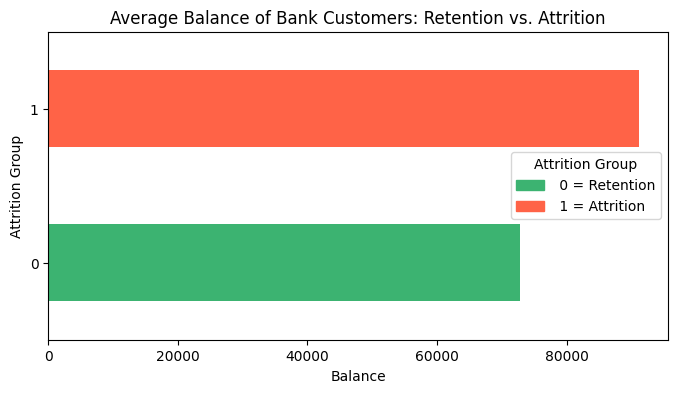

In [27]:
# Compare average 'Balance' for Retention vs Attrition 

colors = ['#3CB371', '#FF6347'] 
plt.figure(figsize=(8,4))
insight8 = bank_customer_info.groupby('Exited')['Balance'].mean().plot(kind='barh', color=colors)
plt.xlabel('Balance')
plt.ylabel('Attrition Group')
plt.title('Average Balance of Bank Customers: Retention vs. Attrition')
green_patch = mpatches.Patch(color='#3CB371', label=' 0 = Retention') 
red_patch = mpatches.Patch(color='#FF6347', label=' 1 = Attrition') 
plt.legend(handles=[green_patch, red_patch], title='Attrition Group') 
plt.show()

Text(0.5, 1.0, 'Balance of Bank Customers: Retention vs. Attrition')

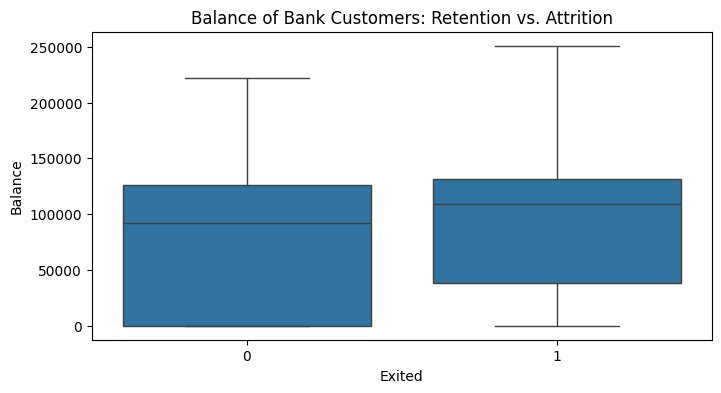

In [28]:
# Using average on 'Balance' will be bias as the data is skewed with high count of 0 

# We will build a box plot to see the distribution better

plt.figure(figsize=(8,4))
sns.boxplot(x='Exited', y='Balance', data=bank_customer_info)
plt.title('Balance of Bank Customers: Retention vs. Attrition')

In [29]:
# To deal with the outlier for 'Balance' as it is not a result of data error 

# It just means more customers do not retain balance with the bank 

# Create grouping for customers with balance vs. those who do not have 

bank_customer_info['HasBalance'] = bank_customer_info['Balance'].apply(lambda x: '0' if x == 0 else '1')

# Display result 

bank_customer_info[['HasBalance', 'Balance']].tail(5)

,HasBalance,Balance
9995,0,0.00
9996,1,57369.61
9997,0,0.00
9998,1,75075.31
9999,1,130142.79


Features (Added): 

| name | description |
| ---    | --- |
| HasBalance | "Balance" values that are converted into bins of whether customer holds balance in their bank account and assigned to numeric labels. 0 = No Balance, 1 = Have Balance.

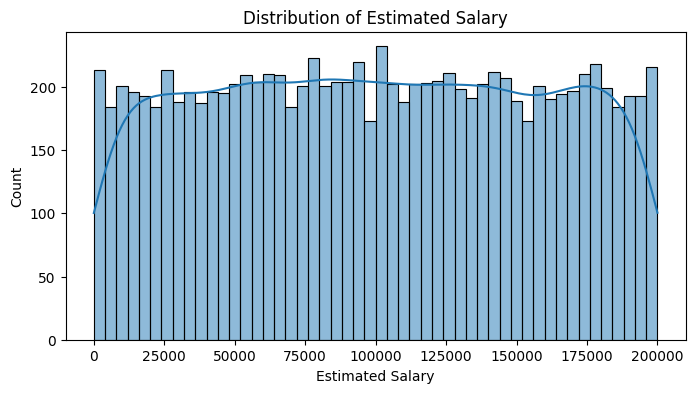

In [30]:
# Creating histogram to visualize the distribution of 'EstimatedSalary'

plt.figure(figsize=(8,4))
sns.histplot(bank_customer_info['EstimatedSalary'], bins=50, kde=True)
plt.title('Distribution of Estimated Salary')
plt.xlabel('Estimated Salary')
plt.ylabel('Count')
plt.show()

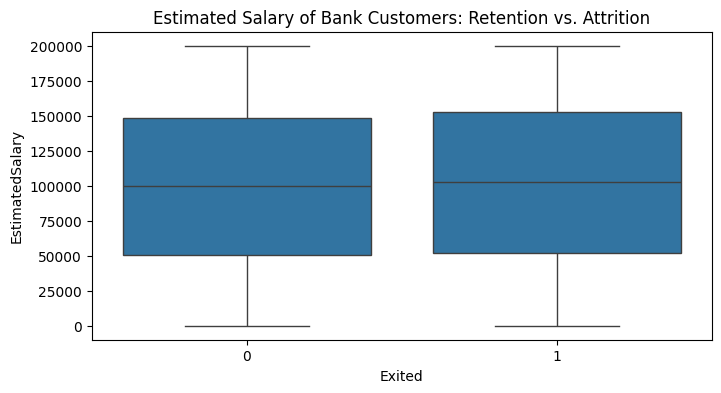

In [31]:
# Similarly we will also build a box plot to prevent any bias

plt.figure(figsize=(8,4))
sns.boxplot(x='Exited', y='EstimatedSalary', data=bank_customer_info)
plt.title('Estimated Salary of Bank Customers: Retention vs. Attrition')
plt.show()

In [32]:
# As the estimated salary of customers are normally distributed 

# We can calculate the ratio of customer's account balance to their estimated salary 

bank_customer_info['BalanceEstSalaryRatio'] = bank_customer_info['Balance'] / (bank_customer_info['EstimatedSalary'])

# Print the first 5 rows 

bank_customer_info.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,...,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned,CreditScoreCategory,CreditScoreCategoryLabel,HasBalance,BalanceEstSalaryRatio
0,1,15598695,Fields,619,France,Female,42,2,0.00,1,...,101348.88,1,1,2,DIAMOND,464,2,Mid,0,0.000000
1,2,15649354,Johnston,608,Spain,Female,41,1,83807.86,1,...,112542.58,0,1,3,DIAMOND,456,2,Mid,1,0.744677
2,3,15737556,Vasilyev,502,France,Female,42,8,159660.80,3,...,113931.57,1,1,3,DIAMOND,377,2,Mid,1,1.401375
3,4,15671610,Hooper,699,France,Female,39,1,0.00,2,...,93826.63,0,0,5,GOLD,350,3,High,0,0.000000
4,5,15625092,Colombo,850,Spain,Female,43,2,125510.82,1,...,79084.10,0,0,5,GOLD,425,4,Very High,1,1.587055


Features (Added): 

| name | description |
| ---    | --- |
| BalanceEstSalaryRatio | "BalanceEstSalaryRatio" indicate how financially engaged the customer is with the bank.

In [33]:
# Look at the min and max of 'BalanceEstSalaryRatio'

bank_customer_info['BalanceEstSalaryRatio'].describe()

count    10000.000000
mean         3.878703
std        108.337260
min          0.000000
25%          0.000000
50%          0.747002
75%          1.514022
max      10614.655440
Name: BalanceEstSalaryRatio, dtype: float64

In [34]:
# To look at the 'Balance' and 'EstimatedSalary' of customers with higher 'BalanceEstSalaryRatio'

insight9 = bank_customer_info.sort_values(by='BalanceEstSalaryRatio')

insight9.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,...,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned,CreditScoreCategory,CreditScoreCategoryLabel,HasBalance,BalanceEstSalaryRatio
1462,1463,15682211,Tu,616,Germany,Female,41,1,103560.57,1,...,236.45,1,1,3,PLATINUM,289,2,Mid,1,437.980842
8722,8723,15807961,Bruno,621,France,Male,35,7,87619.29,1,...,143.34,0,0,2,DIAMOND,270,2,Mid,1,611.268941
7565,7566,15596088,Fanucci,708,France,Male,52,10,105355.81,1,...,123.07,1,1,3,PLATINUM,755,3,High,1,856.064110
9010,9011,15685654,Allan,645,Germany,Female,59,8,121669.93,2,...,91.75,1,1,5,SILVER,291,2,Mid,1,1326.102779
2362,2363,15605872,Felix,709,Germany,Male,45,4,122917.71,1,...,11.58,1,1,5,GOLD,254,3,High,1,10614.655440


Analysis: 

We can tell that customers with generally higher ratio of balance to estimated salary engaged with the bank by keeping a large portion of their money in the bank.  
However, while they have very high account balance, these customers credit a very low estimated salary.  
Looking at their attrition, this can provide insights to the bank that such customers group are at risk of moving the funds elsewhere and eventually leave the bank. 

In [35]:
# To look at the 'Balance' and 'EstimatedSalary' of customers with lower 'BalanceEstSalaryRatio'

insight9.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,...,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned,CreditScoreCategory,CreditScoreCategoryLabel,HasBalance,BalanceEstSalaryRatio
0,1,15598695,Fields,619,France,Female,42,2,0.0,1,...,101348.88,1,1,2,DIAMOND,464,2,Mid,0,0.0
5148,5149,15703264,Chukwufumnanya,731,Spain,Male,70,3,0.0,2,...,141180.66,0,0,2,DIAMOND,409,3,High,0,0.0
5143,5144,15713483,Greeves,646,Spain,Male,31,2,0.0,1,...,170821.43,1,1,4,DIAMOND,350,2,Mid,0,0.0
5142,5143,15628145,Forwood,719,Spain,Female,48,5,0.0,2,...,78563.66,0,0,4,GOLD,922,3,High,0,0.0
5141,5142,15724944,Tien,774,Spain,Male,32,9,0.0,2,...,10604.48,0,0,3,DIAMOND,752,4,Very High,0,0.0


Analysis: 

On the other hand, customers with lower ratio of balance to estimated salary do not have any balance in their account. These group of customers could also be keeping their funds elsewhere which is a subtle flag of exiting. 

In [36]:
# Print the number of customers per 'Card Type'

# To assume 'Card Type' is an unordered category. It is a separate feature as the values like DIAMOND, PLATINUM etc is not in sequence 

print(bank_customer_info['Card Type'].value_counts())

Card Type
DIAMOND     2507
GOLD        2502
SILVER      2496
PLATINUM    2495
Name: count, dtype: int64


In [37]:
# Calculate the Attrition Rate of 'Card Type' 

cardtype_cr = (bank_customer_info.groupby('Card Type')['Exited'].mean() * 100).round(2)
# .mean() is used on a binary column as it will give the proportion of 1s 
# The sum of the column gives the total number of customers who exited 
# The count gives the total number of customers 
# Mean = sum of exited (exited customers) / number of customer (total customers) = Attrition Rate 
cardtype_cr

Card Type
DIAMOND     21.78
GOLD        19.26
PLATINUM    20.36
SILVER      20.11
Name: Exited, dtype: float64

Text(0, 0.5, 'Attrition Rate %')

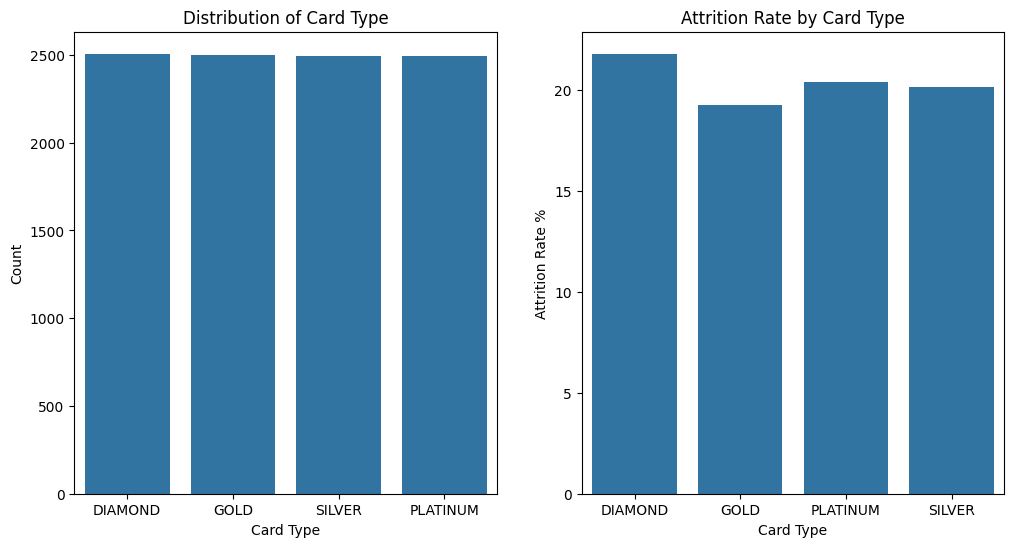

In [38]:
# Visualize the distribution of the bank's customers' 'Card Type'

fig, axes = plt.subplots(1, 2, figsize=(12,6))

# Plot 1: Number of customers per 'Card Type'  

sns.countplot(x='Card Type', data=bank_customer_info, ax=axes[0])
axes[0].set_title('Distribution of Card Type')
axes[0].set_xlabel('Card Type')
axes[0].set_ylabel('Count')

# Plot 2: Attrition Rate by each 'Card Type' 

cardtype_cr = (bank_customer_info.groupby('Card Type')['Exited'].mean() * 100).round(2).reset_index()
sns.barplot(x='Card Type', y='Exited', data=cardtype_cr, ax=axes[1])
axes[1].set_title('Attrition Rate by Card Type')
axes[1].set_xlabel('Card Type')
axes[1].set_ylabel('Attrition Rate %')

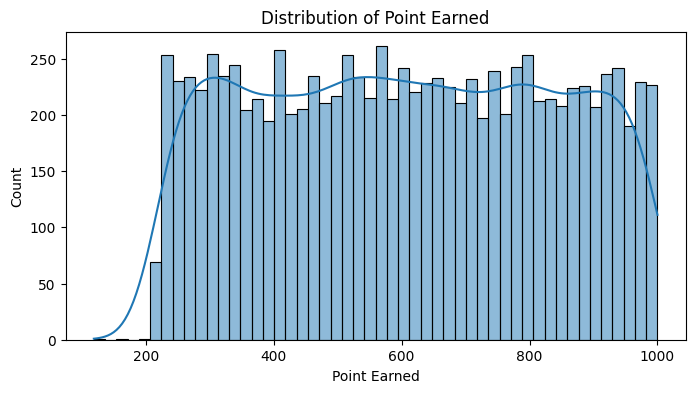

In [39]:
# Creating histogram to visualize the distribution of 'Point Earned'

plt.figure(figsize=(8,4))
sns.histplot(bank_customer_info['Point Earned'], bins=50, kde=True)
plt.title('Distribution of Point Earned')
plt.xlabel('Point Earned')
plt.ylabel('Count')
plt.show()

Text(0.5, 1.0, 'Point Earned by Customers: Retention vs. Attrition')

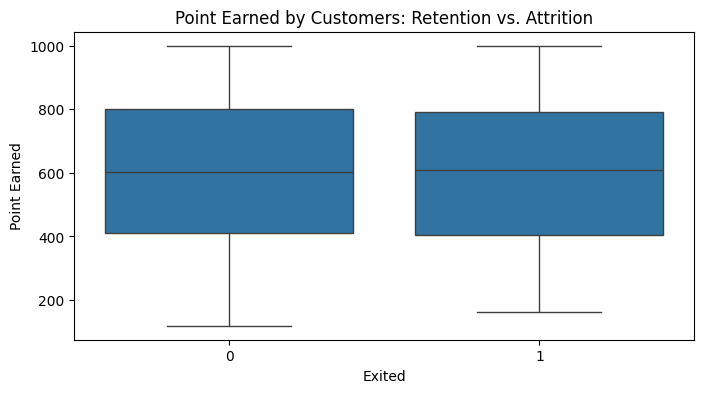

In [40]:
# To see the distribution of the points earned by customer in each attrition group 

plt.figure(figsize=(8,4))
sns.boxplot(x='Exited', y='Point Earned', data=bank_customer_info)
plt.title('Point Earned by Customers: Retention vs. Attrition')

In [41]:
# Print the number of customers in each 'Geography'

print(bank_customer_info['Geography'].value_counts())

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64


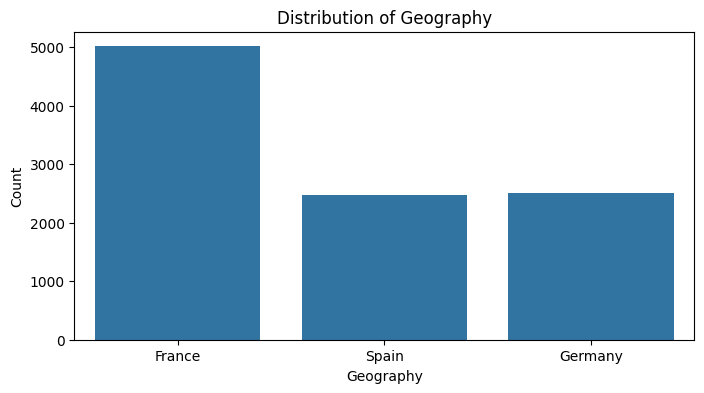

In [42]:
# Visualize the distribution of the bank's customers' 'Geography'

plt.figure(figsize=(8,4))
sns.countplot(x='Geography', data=bank_customer_info)
plt.title('Distribution of Geography')
plt.xlabel('Geography')
plt.ylabel('Count')
plt.show()

In [43]:
# Calculate the Attrition Rate for 'Geography'

geography_cr = (bank_customer_info.groupby('Geography')['Exited'].mean() * 100).round(2) 
# round(2) function to round the values to two decimal places
print(f"AttritionRate: {geography_cr}")

AttritionRate: Geography
France     16.17
Germany    32.44
Spain      16.67
Name: Exited, dtype: float64


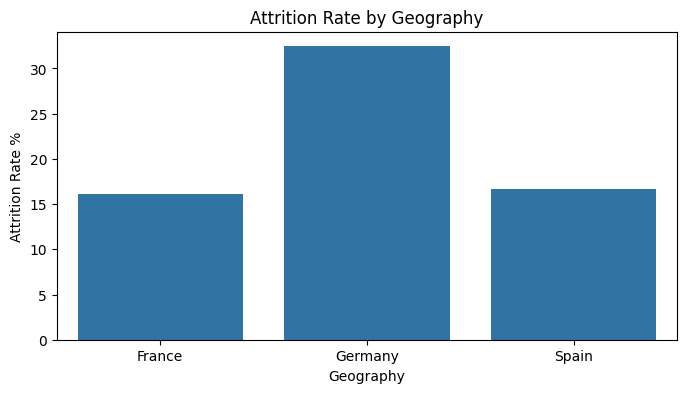

In [44]:
# Then visualize based on the Attrition Rate in each 'Geography'

geography_cr = (bank_customer_info.groupby('Geography')['Exited'].mean() * 100).round(2).reset_index() 
# reset_index() to make Geography a column rather than the index
plt.figure(figsize=(8,4))
sns.barplot(x='Geography', y='Exited', data=geography_cr)
plt.title('Attrition Rate by Geography')
plt.xlabel('Geography')
plt.ylabel('Attrition Rate %')
plt.show()

Analysis: 

The bank's largest customer base comes from France.  
However, based on the comparison of attrition rates across the geographical location, it is shown that Germany has the highest attrition rate. 

In [45]:
# Print the number of customers by 'Gender'

print(bank_customer_info['Gender'].value_counts())

Gender
Male      5457
Female    4543
Name: count, dtype: int64


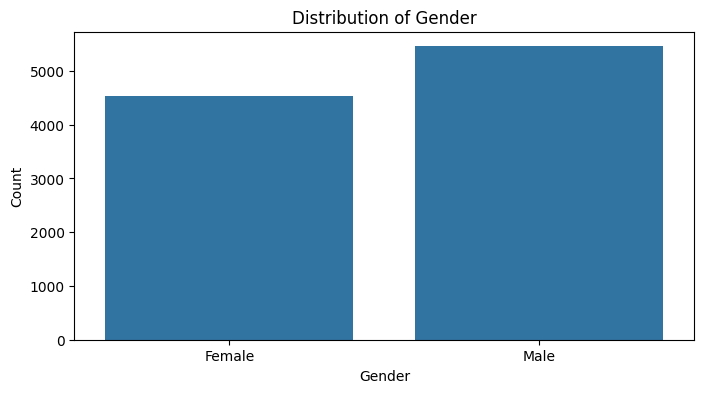

In [46]:
# Visualize the distribution of the bank's customers' 'Gender'

plt.figure(figsize=(8,4))
sns.countplot(x='Gender', data=bank_customer_info)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [47]:
# Calculate the Attrition Rate for 'Gender'

gender_cr = (bank_customer_info.groupby('Gender')['Exited'].mean() * 100).round(2) 
print(f"AttritionRate: {gender_cr}")

AttritionRate: Gender
Female    25.07
Male      16.47
Name: Exited, dtype: float64


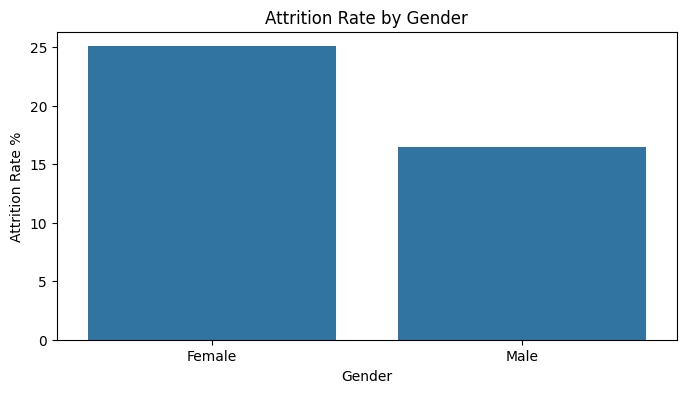

In [48]:
# Then visualize based on the Attrition Rate for each 'Gender'

gender_cr = (bank_customer_info.groupby('Gender')['Exited'].mean() * 100).round(2).reset_index() 
plt.figure(figsize=(8,4))
sns.barplot(x='Gender', y='Exited', data=gender_cr)
plt.title('Attrition Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Attrition Rate %')
plt.show()

Analysis: 

Male customers takes up the bank's largest customer base.  
However, based on the comparison of Attrition Rates between the Gender, it is shown that Female customers are more likely to exit. 

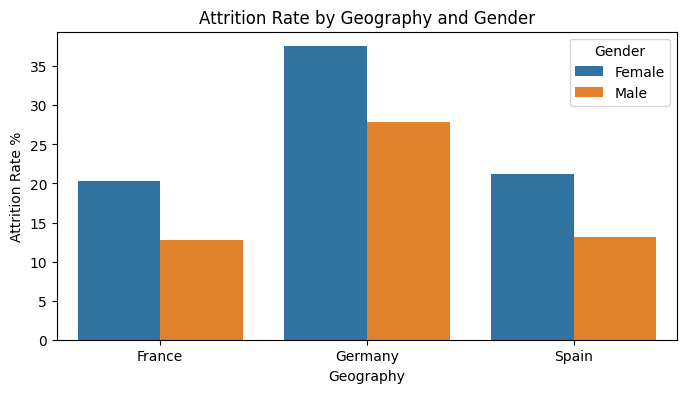

In [49]:
# To compare the Attrition Rate for each 'Geography' by 'Gender' 

insight10 = (bank_customer_info.groupby(['Geography', 'Gender'])['Exited'].mean() * 100).round(2).reset_index() 
plt.figure(figsize=(8,4))
sns.barplot(x='Geography', y='Exited', hue='Gender', data=insight10)
plt.title('Attrition Rate by Geography and Gender')
plt.ylabel('Attrition Rate %')
plt.show()

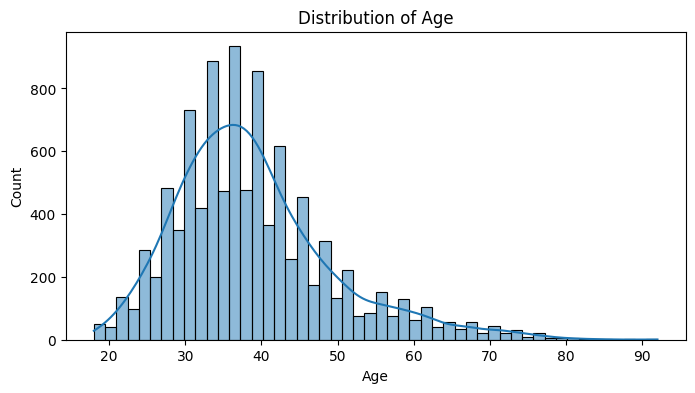

In [50]:
# Visualize the distribution of 'Age' among the bank's customers 

plt.figure(figsize=(8,4))
sns.histplot(bank_customer_info['Age'], bins=50, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [51]:
# Put 'Age' into groups 

age_bins = [18, 30, 40, 50, 60, 70, 80, 100] # Define the intervals or bins into which the data will be divided
age_labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+']
bank_customer_info['AgeCategoryLabel'] = pd.cut(bank_customer_info['Age'], bins=age_bins, labels=age_labels, right=True, include_lowest=True) 
# pd.cut is used to segment and sort data values into discrete intervals or bins 
# include_lowest=True to include both endpoints so that 18 and 92 are covered

# Count the number of customer within the 'AgeCategoryLabel'

print(bank_customer_info['AgeCategoryLabel'].value_counts())

# Print the DataFrame

bank_customer_info

AgeCategoryLabel
30-39    4451
40-49    2320
18-29    1968
50-59     797
60-69     331
70-79     121
80+        12
Name: count, dtype: int64


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,...,Exited,Complain,Satisfaction Score,Card Type,Point Earned,CreditScoreCategory,CreditScoreCategoryLabel,HasBalance,BalanceEstSalaryRatio,AgeCategoryLabel
0,1,15598695,Fields,619,France,Female,42,2,0.00,1,...,1,1,2,DIAMOND,464,2,Mid,0,0.000000,40-49
1,2,15649354,Johnston,608,Spain,Female,41,1,83807.86,1,...,0,1,3,DIAMOND,456,2,Mid,1,0.744677,40-49
2,3,15737556,Vasilyev,502,France,Female,42,8,159660.80,3,...,1,1,3,DIAMOND,377,2,Mid,1,1.401375,40-49
3,4,15671610,Hooper,699,France,Female,39,1,0.00,2,...,0,0,5,GOLD,350,3,High,0,0.000000,30-39
4,5,15625092,Colombo,850,Spain,Female,43,2,125510.82,1,...,0,0,5,GOLD,425,4,Very High,1,1.587055,40-49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15583480,Morgan,771,France,Male,39,5,0.00,2,...,0,0,1,DIAMOND,300,4,Very High,0,0.000000,30-39
9996,9997,15620341,Nwebube,516,France,Male,35,10,57369.61,1,...,0,0,5,PLATINUM,771,2,Mid,1,0.564108,30-39
9997,9998,15613886,Trevisan,709,France,Female,36,7,0.00,1,...,1,1,3,SILVER,564,3,High,0,0.000000,30-39
9998,9999,15792916,Ositadimma,772,Germany,Male,42,3,75075.31,2,...,1,1,2,GOLD,339,4,Very High,1,0.808230,40-49


Features (Added): 

| name | description |
| ---    | --- |
| AgeCategoryLabel | "Age" values that are segmented into bins and then assigned to labels. 18-29, 30-39, 40-49, 50-59, 60-69, 70-79, 80+.

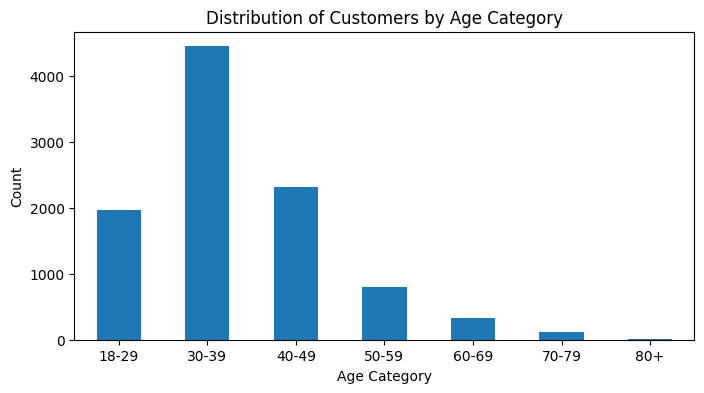

In [52]:
# Visualize the number of customers in each 'AgeCategoryLabel'

# Define the order for 'AgeCategoryLabel' and convert to a categorical variable before plotting 

agecategorylabel_order = ['18-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+']
bank_customer_info['AgeCategoryLabel'] = pd.Categorical(bank_customer_info['AgeCategoryLabel'], 
                                                        categories=agecategorylabel_order, ordered=True)
insight11 = bank_customer_info['AgeCategoryLabel'].value_counts() 
plt.figure(figsize=(8, 4))
insight11 = insight11[insight11.index.isin(agecategorylabel_order)] # Ensure it follows the order
insight11 = insight11[agecategorylabel_order] # Reorder based on custom order
insight11.plot(kind='bar')
plt.title('Distribution of Customers by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.xticks(rotation=360)
plt.show()

/var/folders/bv/ycf3qx6d7hg1dyfy3547zgl80000gn/T/ipykernel_12598/3801437407.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  insight12 = bank_customer_info.groupby(['CreditScoreCategory', 'AgeCategoryLabel']).size().reset_index(name='Count')


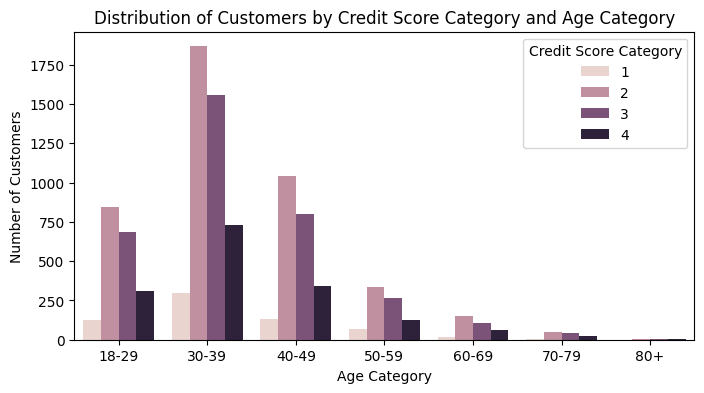

In [53]:
# Visualize customers by 'CreditScoreCategory' and 'AgeCategoryLabel'

# To find out what is the age group of the customers whose 'CreditScoreCategory' is at 'Mid' level 

# Group by 'CreditScoreCategory' and 'AgeCategoryLabel' and count the number of customers in each group

insight12 = bank_customer_info.groupby(['CreditScoreCategory', 'AgeCategoryLabel']).size().reset_index(name='Count')

plt.figure(figsize=(8, 4))
sns.barplot(x='AgeCategoryLabel', y='Count', hue='CreditScoreCategory', data=insight12)
plt.title('Distribution of Customers by Credit Score Category and Age Category')
plt.ylabel('Number of Customers')
plt.xlabel('Age Category')
plt.legend(title='Credit Score Category', loc='upper right')
plt.show() 

Analysis: 

This allow us to see certain 'CreditScoreCategory' or 'AgeCategoryLabel' having a higher count.  
Majority of the bank customers who have mid to high credit scores belong to the age group of 30-39 and 40-49.  
This could indicate that these groups had reached an income level to have a higher spending power as compared to 18-29 who may just started working or 50-59 who are preparing for retirement.

In [54]:
# Convert the data type for 'CreditScoreCategory'

# Define the order 

CreditScoreCategory = CategoricalDtype(categories=[1, 2, 3, 4], ordered=True)

# Apply the order

bank_customer_info['CreditScoreCategory'] = bank_customer_info['CreditScoreCategory'].astype(CreditScoreCategory)

In [55]:
# Check the data type of the 'AgeCategoryLabel' column

bank_customer_info['AgeCategoryLabel'].dtype 

CategoricalDtype(categories=['18-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+'], ordered=True, categories_dtype=object)

In [56]:
# Need to assign numerical labels to 'AgeCategoryLabel' column so that the data type is in numerical 

def agecategorylabel_category(agecat): 
                            # agecat as the parameter name and placeholder to be used 
                            # when the function is called to pass the actual value from the column to the parameter 
    if agecat == '18-29':
        return 1 
    elif agecat == '30-39': 
        return 2 
    elif agecat == '40-49': 
        return 3 
    elif agecat == '50-59': 
        return 4 
    elif agecat == '60-69':
        return 5
    elif agecat == '70-79': 
        return 6
    elif agecat == '80+':
        return 7 
    else: 
        return 0

# Create a new column 'AgeCategory' to apply the function to assign numerical labels 

bank_customer_info['AgeCategory'] = bank_customer_info['AgeCategoryLabel'].apply(agecategorylabel_category)

# Preview the DataFrame at random  

bank_customer_info.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,...,Complain,Satisfaction Score,Card Type,Point Earned,CreditScoreCategory,CreditScoreCategoryLabel,HasBalance,BalanceEstSalaryRatio,AgeCategoryLabel,AgeCategory
4555,4556,15655360,Chikelu,688,Spain,Female,35,6,0.00,1,...,1,1,SILVER,901,3,High,0,0.000000,30-39,2
5581,5582,15737741,McKay,494,Spain,Male,67,5,0.00,2,...,0,2,GOLD,408,1,Low,0,0.000000,60-69,5
364,365,15704144,Mazzanti,640,France,Male,68,9,0.00,2,...,0,4,PLATINUM,763,2,Mid,0,0.000000,60-69,5
7726,7727,15807045,Milanesi,735,France,Male,55,6,134140.68,1,...,0,4,DIAMOND,425,3,High,1,59.148050,50-59,4
8658,8659,15661903,Hsia,557,Germany,Female,38,2,129893.56,1,...,0,2,PLATINUM,823,2,Mid,1,1.272518,30-39,2


Features (Added): 

| name | description |
| ---    | --- |
| AgeCategory | "AgeCategoryLabel" values that are assigned to numeric labels. 1 = 18-29, 2 = 30-39, 3 = 40-49, 4 = 50-59, 5 = 60-69, 6 = 70-79, 7 = 80+.

In [57]:
# Check the data type of the 'AgeCategory' column

bank_customer_info['AgeCategory'].dtype 

CategoricalDtype(categories=[1, 2, 3, 4, 5, 6, 7], ordered=True, categories_dtype=int64)

/var/folders/bv/ycf3qx6d7hg1dyfy3547zgl80000gn/T/ipykernel_12598/1585315330.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  insight13 = bank_customer_info.groupby(['AgeCategoryLabel', 'Exited']).size().unstack(fill_value=0)


<Figure size 800x400 with 0 Axes>

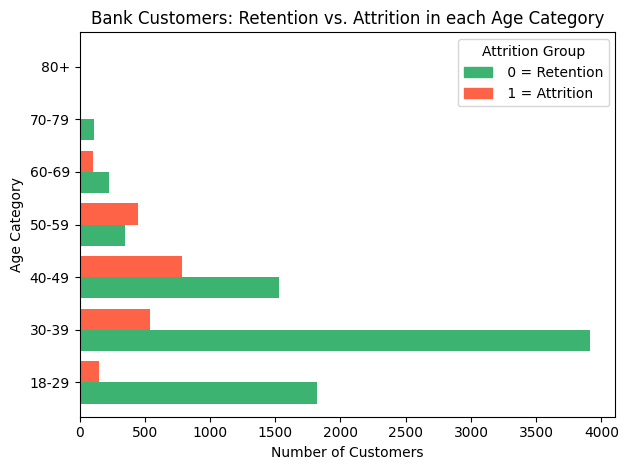

In [58]:
# Visualize the Target Variable 'Exited' with 'AgeCategory' 

insight13 = bank_customer_info.groupby(['AgeCategoryLabel', 'Exited']).size().unstack(fill_value=0)
colors = ['#3CB371', '#FF6347']  
plt.figure(figsize=(8,4))
insight13.plot(kind='barh', color=colors, width=0.8)
plt.xlabel('Number of Customers')
plt.ylabel('Age Category')
plt.title('Bank Customers: Retention vs. Attrition in each Age Category') 
green_patch = mpatches.Patch(color='#3CB371', label=' 0 = Retention')  
red_patch = mpatches.Patch(color='#FF6347', label=' 1 = Attrition')  
plt.legend(handles=[green_patch, red_patch], title='Attrition Group') 
plt.tight_layout()
plt.show() 

Analysis: 

Generally, customers with higher credit scores are considered more financially stable and less likely to leave the bank.  
We can see that customers between the age of 30-39, they have the highest retention count.  
Though most of the customers between the age of 40-49 have mid to high credit scores, they are also seen to be less loyal or more likely to discontinue services.  
This could indicate that this segment is at a higher risk of exit.  
Recommendations to the bank could include looking into products/cards specification.  
Bar did not show for customers whose age is 80+ as there is only a minority of them.

In [59]:
# Convert the data type for 'AgeCategory'

# Define the order 

AgeCategory = CategoricalDtype(categories=[1, 2, 3, 4, 5, 6, 7], ordered=True)

# Apply the order

bank_customer_info['AgeCategory'] = bank_customer_info['AgeCategory'].astype(AgeCategory)

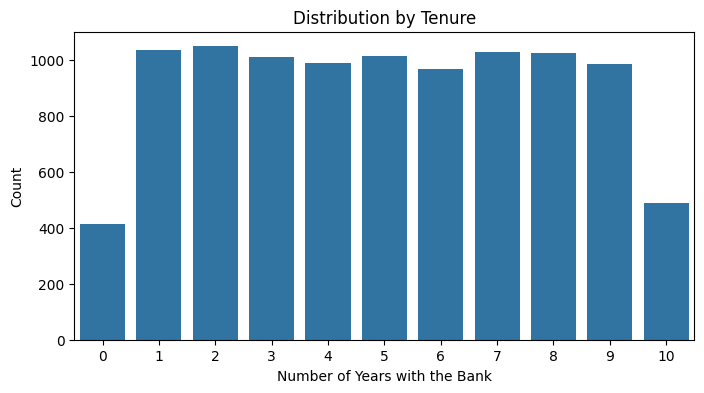

In [60]:
# Visualize the distribution of customers by 'Tenure'

plt.figure(figsize=(8,4))
sns.countplot(x='Tenure', data=bank_customer_info)
plt.title('Distribution by Tenure')
plt.xlabel('Number of Years with the Bank')
plt.ylabel('Count')
plt.show()

<Figure size 800x400 with 0 Axes>

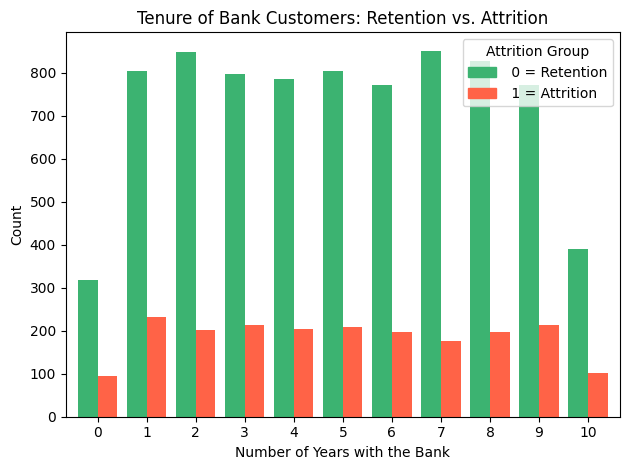

In [61]:
# Visualize the Retention vs Attrition by 'Tenure'  

insight14 = bank_customer_info.groupby(['Tenure', 'Exited']).size().unstack(fill_value=0)
colors = ['#3CB371', '#FF6347'] 
plt.figure(figsize=(8,4))
insight14.plot(kind='bar', color=colors, width=0.8)
plt.xlabel('Number of Years with the Bank')
plt.ylabel('Count')
plt.title('Tenure of Bank Customers: Retention vs. Attrition') 
green_patch = mpatches.Patch(color='#3CB371', label=' 0 = Retention')  
red_patch = mpatches.Patch(color='#FF6347', label=' 1 = Attrition')  
plt.legend(handles=[green_patch, red_patch], title='Attrition Group') 
plt.xticks(rotation=360)
plt.tight_layout()
plt.show()

In [62]:
# To also look at the Attrition Rate

tenure_cr = (bank_customer_info.groupby('Tenure')['Exited'].mean() * 100).round(2) 
print(f"AttritionRate: {tenure_cr}")

AttritionRate: Tenure
0     23.00
1     22.42
2     19.18
3     21.11
4     20.53
5     20.65
6     20.27
7     17.22
8     19.22
9     21.75
10    20.61
Name: Exited, dtype: float64


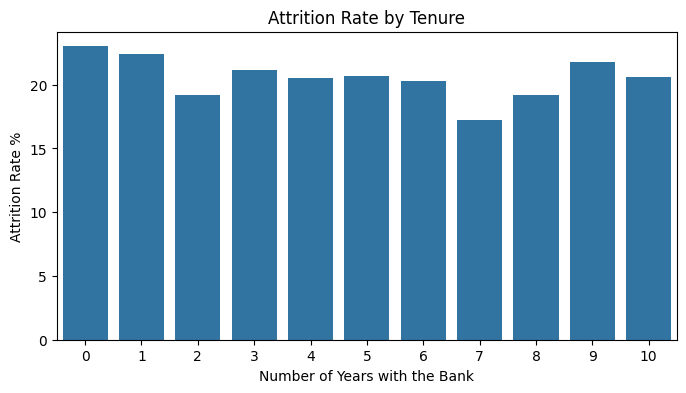

In [63]:
# Visualize the Attrition Rate based on each year of 'Tenure'

tenure_cr = (bank_customer_info.groupby('Tenure')['Exited'].mean() * 100).round(2).reset_index() 
plt.figure(figsize=(8,4))
sns.barplot(x='Tenure', y='Exited', data=tenure_cr)
plt.title('Attrition Rate by Tenure')
plt.xlabel('Number of Years with the Bank')
plt.ylabel('Attrition Rate %')
plt.show()

In [64]:
# Put 'Tenure' into bins to categorize customers based on how long they have been with the bank 

def tenure_category(noofyear):
    if 0 <= noofyear <= 2:
        return 1 # Short year
    elif 3 <= noofyear <= 7: 
        return 2 # Mid year
    elif 8 <= noofyear <= 10: 
        return 3 # Long year
    else: 
        return 0

bank_customer_info['TenureCategory'] = bank_customer_info['Tenure'].apply(tenure_category)

bank_customer_info

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,...,Satisfaction Score,Card Type,Point Earned,CreditScoreCategory,CreditScoreCategoryLabel,HasBalance,BalanceEstSalaryRatio,AgeCategoryLabel,AgeCategory,TenureCategory
0,1,15598695,Fields,619,France,Female,42,2,0.00,1,...,2,DIAMOND,464,2,Mid,0,0.000000,40-49,3,1
1,2,15649354,Johnston,608,Spain,Female,41,1,83807.86,1,...,3,DIAMOND,456,2,Mid,1,0.744677,40-49,3,1
2,3,15737556,Vasilyev,502,France,Female,42,8,159660.80,3,...,3,DIAMOND,377,2,Mid,1,1.401375,40-49,3,3
3,4,15671610,Hooper,699,France,Female,39,1,0.00,2,...,5,GOLD,350,3,High,0,0.000000,30-39,2,1
4,5,15625092,Colombo,850,Spain,Female,43,2,125510.82,1,...,5,GOLD,425,4,Very High,1,1.587055,40-49,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15583480,Morgan,771,France,Male,39,5,0.00,2,...,1,DIAMOND,300,4,Very High,0,0.000000,30-39,2,2
9996,9997,15620341,Nwebube,516,France,Male,35,10,57369.61,1,...,5,PLATINUM,771,2,Mid,1,0.564108,30-39,2,3
9997,9998,15613886,Trevisan,709,France,Female,36,7,0.00,1,...,3,SILVER,564,3,High,0,0.000000,30-39,2,2
9998,9999,15792916,Ositadimma,772,Germany,Male,42,3,75075.31,2,...,2,GOLD,339,4,Very High,1,0.808230,40-49,3,2


Features (Added): 

| name | description |
| ---    | --- |
| TenureCategory | "Tenure" values that are segmented into bins and then assigned to numeric labels. 1 = 0-2, 2 = 3-7, 3 = 8-10.

In [65]:
# Look at the Attrition Rate by 'TenureCategory'

tenurecat_cr = (bank_customer_info.groupby('TenureCategory')['Exited'].mean() * 100).round(2) 
print(f"AttritionRate: {tenurecat_cr}")

AttritionRate: TenureCategory
1    21.15
2    19.94
3    20.49
Name: Exited, dtype: float64


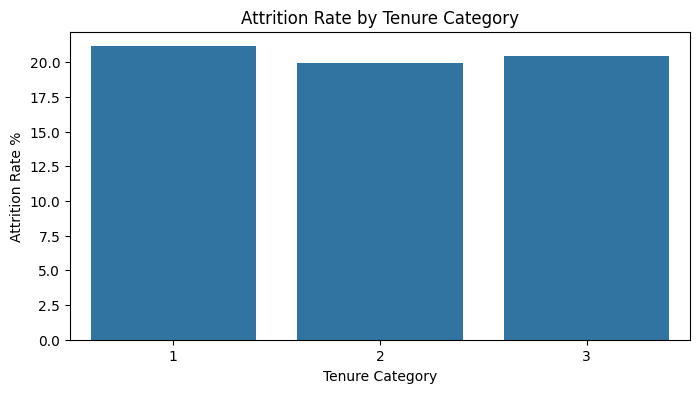

In [66]:
# Visualize the Attrition Rate based on the 'Tenure' group

tenurecat_cr = (bank_customer_info.groupby('TenureCategory')['Exited'].mean() * 100).round(2).reset_index() 
plt.figure(figsize=(8,4))
sns.barplot(x='TenureCategory', y='Exited', data=tenurecat_cr)
plt.title('Attrition Rate by Tenure Category')
plt.xlabel('Tenure Category')
plt.ylabel('Attrition Rate %')
plt.show()

In [67]:
# Convert the data type for 'HasCrCard'

bank_customer_info['TenureCategory'] = bank_customer_info['TenureCategory'].astype('category')

Analysis: 

After grouping the number of years the customers are with the bank, we can tell that there is a higher attrition rate by customers who are newer to the bank. 

In [68]:
# From the initial data exploration, it is seen that the maximum number of products which customers hold is 4

bank_customer_info['NumOfProducts'].value_counts()

NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

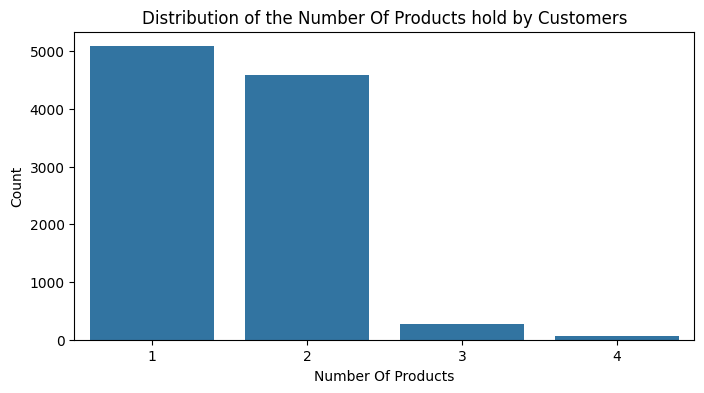

In [69]:
# We will create a bar chart 

plt.figure(figsize=(8,4))
sns.countplot(x='NumOfProducts', data=bank_customer_info)
plt.title('Distribution of the Number Of Products hold by Customers')
plt.xlabel('Number Of Products')
plt.ylabel('Count')
plt.show()

In [70]:
# Calculate the Attrition Rate for 'NumOfProducts'

numofproducts_cr = (bank_customer_info.groupby('NumOfProducts')['Exited'].mean() * 100).round(2) 
print(f"AttritionRate: {numofproducts_cr}")

AttritionRate: NumOfProducts
1     27.71
2      7.60
3     82.71
4    100.00
Name: Exited, dtype: float64


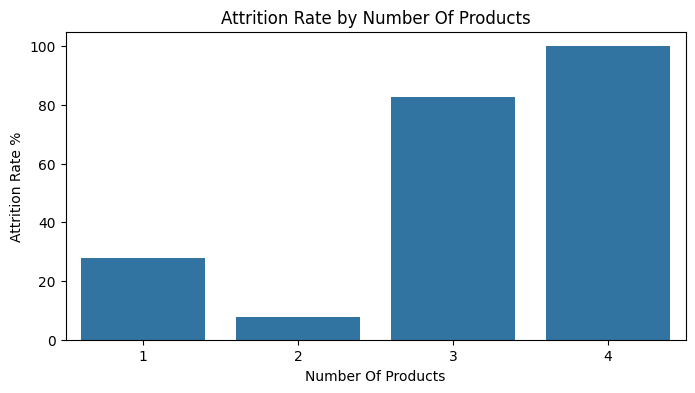

In [71]:
# Then visualize based on the Attrition Rate for each 'NumOfProducts'

numofproducts_cr = (bank_customer_info.groupby('NumOfProducts')['Exited'].mean() * 100).round(2).reset_index() 
plt.figure(figsize=(8,4))
sns.barplot(x='NumOfProducts', y='Exited', data=numofproducts_cr)
plt.title('Attrition Rate by Number Of Products')
plt.xlabel('Number Of Products')
plt.ylabel('Attrition Rate %')
plt.show()

Analysis: 

There may be biasness in the data as there are only 60 customers holding a total of 4 products.  
Based on the customers who hold 1 and 2 products, the attrition rate is higher for customers who only hold 1 product with the bank.  
This can tell that customers who hold at least 2 products may be more engaged with the bank so the likelihood to exit is lower. 

In [72]:
# Create new column based on 'Balance' and 'NumOfProducts'

bank_customer_info['BalPerProduct'] = bank_customer_info['Balance'] / bank_customer_info['NumOfProducts']

# Display the results of those with higher 'BalPerProduct'

bank_customer_info.sort_values(by='BalPerProduct', ascending=False).head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,...,Card Type,Point Earned,CreditScoreCategory,CreditScoreCategoryLabel,HasBalance,BalanceEstSalaryRatio,AgeCategoryLabel,AgeCategory,TenureCategory,BalPerProduct
3280,3281,15745716,McGregor,583,France,Female,57,3,238387.56,1,...,GOLD,552,2,Mid,1,1.611108,50-59,4,2,238387.56
8733,8734,15713374,Jarvis,749,Spain,Male,42,9,222267.63,1,...,GOLD,763,3,High,1,2.198300,40-49,3,3,222267.63
3588,3589,15742809,Mironova,489,Spain,Male,40,3,221532.80,1,...,DIAMOND,636,1,Low,1,1.288978,30-39,2,2,221532.80
6717,6718,15684269,Gray,663,Spain,Female,58,5,216109.88,1,...,SILVER,251,3,High,1,2.913447,50-59,4,2,216109.88
138,139,15589969,Capon,584,Spain,Female,48,2,213146.20,1,...,DIAMOND,814,2,Mid,1,2.835852,40-49,3,1,213146.20


Features (Added): 

| name | description |
| ---    | --- |
| BalPerProduct | "BalPerProduct" indicate how much balance the customer holds on average per product they own.

In [73]:
# To look at those with lower 'BalPerProduct'

bank_customer_info.sort_values(by='BalPerProduct', ascending=True).head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,...,Card Type,Point Earned,CreditScoreCategory,CreditScoreCategoryLabel,HasBalance,BalanceEstSalaryRatio,AgeCategoryLabel,AgeCategory,TenureCategory,BalPerProduct
0,1,15598695,Fields,619,France,Female,42,2,0.0,1,...,DIAMOND,464,2,Mid,0,0.0,40-49,3,1,0.0
5148,5149,15703264,Chukwufumnanya,731,Spain,Male,70,3,0.0,2,...,DIAMOND,409,3,High,0,0.0,60-69,5,2,0.0
5143,5144,15713483,Greeves,646,Spain,Male,31,2,0.0,1,...,DIAMOND,350,2,Mid,0,0.0,30-39,2,1,0.0
5142,5143,15628145,Forwood,719,Spain,Female,48,5,0.0,2,...,GOLD,922,3,High,0,0.0,40-49,3,2,0.0
5141,5142,15724944,Tien,774,Spain,Male,32,9,0.0,2,...,DIAMOND,752,4,Very High,0,0.0,30-39,2,3,0.0


In [74]:
# Also creating new column based on 'EstimatedSalary' and 'NumOfProducts'

bank_customer_info['EstSalaryToProductRatio'] = bank_customer_info['EstimatedSalary'] / bank_customer_info['NumOfProducts'].replace(0, 1)

Features (Added): 

| name | description |
| ---    | --- |
| EstSalaryToProductRatio | "EstSalaryToProductRatio" shows the affordability of products.

Text(0.5, 0.98, '')

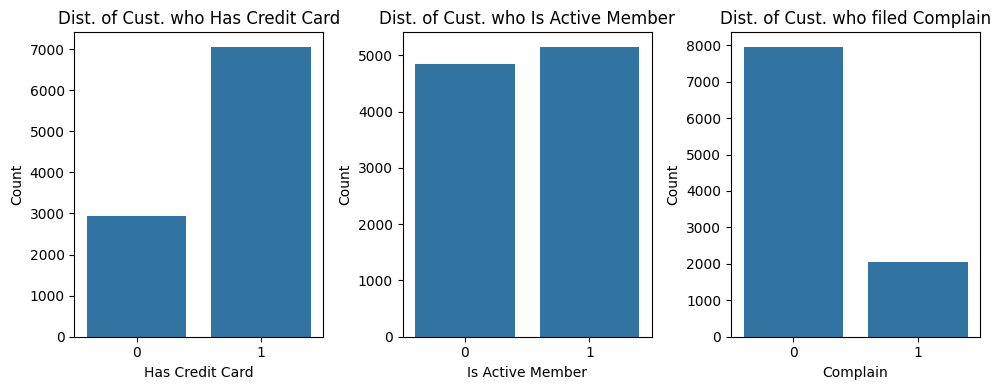

In [75]:
# Visualize the other Features like 'HasCrCard', 'IsActiveMember', 'Complain'

fig, axes = plt.subplots(1, 3, figsize=(10,4))

# Plot 1: Number of customers who have a credit card with the bank vs. does not have  

sns.countplot(x='HasCrCard', data=bank_customer_info, ax=axes[0])
axes[0].set_title('Dist. of Cust. who Has Credit Card')
axes[0].set_xlabel('Has Credit Card')
axes[0].set_ylabel('Count')

# Plot 2: Number of customers who is an active member with the bank vs. is not 

sns.countplot(x='IsActiveMember', data=bank_customer_info, ax=axes[1])
axes[1].set_title('Dist. of Cust. who Is Active Member')
axes[1].set_xlabel('Is Active Member')
axes[1].set_ylabel('Count')

# Plot 3: Number of customers who filed a complaint with the bank vs. did not 

sns.countplot(x='Complain', data=bank_customer_info, ax=axes[2])
axes[2].set_title('Dist. of Cust. who filed Complain')
axes[2].set_xlabel('Complain')
axes[2].set_ylabel('Count')

plt.tight_layout()
plt.suptitle('')  # Remove default suptitle

# Data dictionary did not provide the definition of 0 and 1. To assume from analysis 

In [76]:
# To assume that 

# Customers who have credit card (1)

# Customers who do not have credit card with the bank (0)

# This assumption is made as a bank cannot operate if majority of its customers do not have a credit card applied under them  

# Then we calculate the Attrition Rate for 'HasCrCard' to verify this assumption 

hascrcard_cr = (bank_customer_info.groupby('HasCrCard')['Exited'].mean() * 100).round(2)
print(f"AttritionRate: {hascrcard_cr}")

# Customers who do not have credit card with the bank - 0 have slightly higher attrition rate than Customers who have credit card (1) by 0.61 

# Having a credit card typically reduces the likelihood of customer attrition 

# We can confirm the assumption of HasCrCard (1), NoCrCard (0) 

AttritionRate: HasCrCard
0    20.81
1    20.20
Name: Exited, dtype: float64


In [77]:
# Convert the data type for 'HasCrCard'

bank_customer_info['HasCrCard'] = bank_customer_info['HasCrCard'].astype('object')

In [78]:
# To assume that 

# Yes is an active member (1)

# Is not an active member (0) 

# This assumption is made because a bank generally have more active customers than non-active customers  

# Calculate the Attrition Rate for 'IsActiveMember'  

isactivemember_cr = (bank_customer_info.groupby('IsActiveMember')['Exited'].mean() * 100).round(2)
print(f"AttritionRate: {isactivemember_cr}")

# Attrition rate makes sense as the customers who left is higher for non-active members (0) - 26.87

# Customers are not actively engaged with the bank so it is more likely for them to exit 

# This can be one of the recommendations for the bank to look into this 

AttritionRate: IsActiveMember
0    26.87
1    14.27
Name: Exited, dtype: float64


In [79]:
# Convert the data type for 'IsActiveMember'

bank_customer_info['IsActiveMember'] = bank_customer_info['IsActiveMember'].astype('object')

In [80]:
# To assume that

# Customer filed complain (1) 

# Customer did not file complain (0)

# Calculate the Attrition Rate for 'Complain'  

complain_cr = (bank_customer_info.groupby('Complain')['Exited'].mean() * 100).round(2)
print(f"AttritionRate: {complain_cr}")

# We can tell that the group of customers who had filed for complain (1), 99.51% of them have terminate their service with the bank 

AttritionRate: Complain
0     0.05
1    99.51
Name: Exited, dtype: float64


In [81]:
# Convert the data type for 'Complain'

bank_customer_info['Complain'] = bank_customer_info['Complain'].astype('object')

In [82]:
# To look at 'Satisfaction Score'

bank_customer_info['Satisfaction Score'].value_counts().sort_index()

# To assume that 

# A higher satisfaction score (5) indicates that the customer is content with the bank and making them less likely to exit 

# Low satisfaction scores are red flags that may suggest the customer is dissatisfied which increases the risk of attrition

Satisfaction Score
1    1932
2    2014
3    2042
4    2008
5    2004
Name: count, dtype: int64

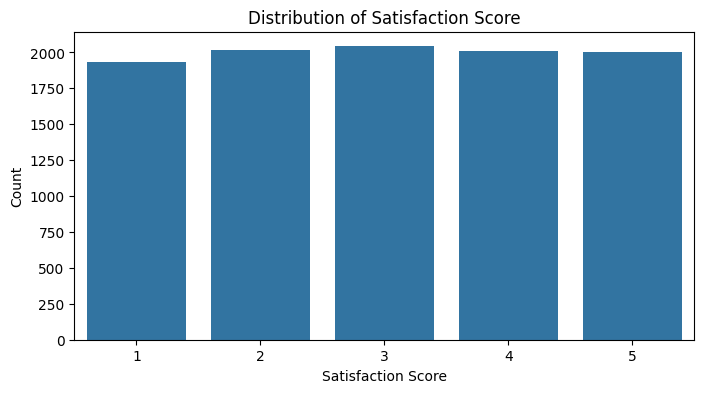

In [83]:
# We will build a bar chart instead to visualize the categorical feature 

plt.figure(figsize=(8,4))
sns.countplot(x='Satisfaction Score', data=bank_customer_info)
plt.title('Distribution of Satisfaction Score')
plt.xlabel('Satisfaction Score')
plt.ylabel('Count')
plt.show()

# Does not show much distinct relationship as there are a lot of customers who also rate 1 to express their dissatisfaction 

# One recommendation for the bank to look into the reasons why this group of customers rate a score of 1 

In [84]:
# Calculate the Attrition Rate for 'Satisfaction Score'

satisfactionscore_cr = (bank_customer_info.groupby('Satisfaction Score')['Exited'].mean() * 100).round(2) 
print(f"AttritionRate: {satisfactionscore_cr}")

AttritionRate: Satisfaction Score
1    20.03
2    21.80
3    19.64
4    20.62
5    19.81
Name: Exited, dtype: float64


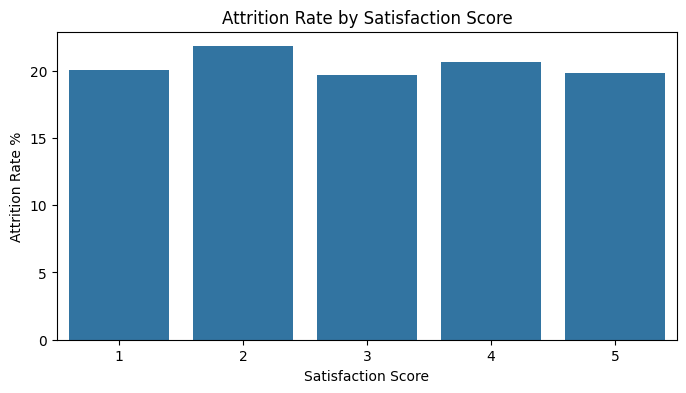

In [85]:
# Then visualize based on the Attrition Rate for each 'Satisfaction Score'

satisfactionscore_cr = (bank_customer_info.groupby('Satisfaction Score')['Exited'].mean() * 100).round(2).reset_index() 
plt.figure(figsize=(8,4))
sns.barplot(x='Satisfaction Score', y='Exited', data=satisfactionscore_cr)
plt.title('Attrition Rate by Satisfaction Score')
plt.xlabel('Satisfaction Score')
plt.ylabel('Attrition Rate %')
plt.show()

Analysis: 

Though the satisfaction score are well distributed, the attrition rate for score of 2 is highest.  

In [86]:
# To look at the data type of the columns in the dataset after exploration

bank_customer_info.dtypes

RowNumber                      int64
CustomerId                     int64
Surname                       object
CreditScore                    int64
Geography                     object
Gender                        object
Age                            int64
Tenure                         int64
Balance                      float64
NumOfProducts                  int64
HasCrCard                     object
IsActiveMember                object
EstimatedSalary              float64
Exited                         int64
Complain                      object
Satisfaction Score             int64
Card Type                     object
Point Earned                   int64
CreditScoreCategory         category
CreditScoreCategoryLabel    category
HasBalance                    object
BalanceEstSalaryRatio        float64
AgeCategoryLabel            category
AgeCategory                 category
TenureCategory              category
BalPerProduct                float64
EstSalaryToProductRatio      float64
d

In [87]:
# Drop columns that are not useful for modeling

bank_customer_info.drop(['RowNumber', 
                        'Surname', 
                        'CreditScoreCategoryLabel', 
                        'AgeCategoryLabel'], axis=1, inplace=True)

In [88]:
# Display the columns again

bank_customer_info.dtypes

CustomerId                    int64
CreditScore                   int64
Geography                    object
Gender                       object
Age                           int64
Tenure                        int64
Balance                     float64
NumOfProducts                 int64
HasCrCard                    object
IsActiveMember               object
EstimatedSalary             float64
Exited                        int64
Complain                     object
Satisfaction Score            int64
Card Type                    object
Point Earned                  int64
CreditScoreCategory        category
HasBalance                   object
BalanceEstSalaryRatio       float64
AgeCategory                category
TenureCategory             category
BalPerProduct               float64
EstSalaryToProductRatio     float64
dtype: object

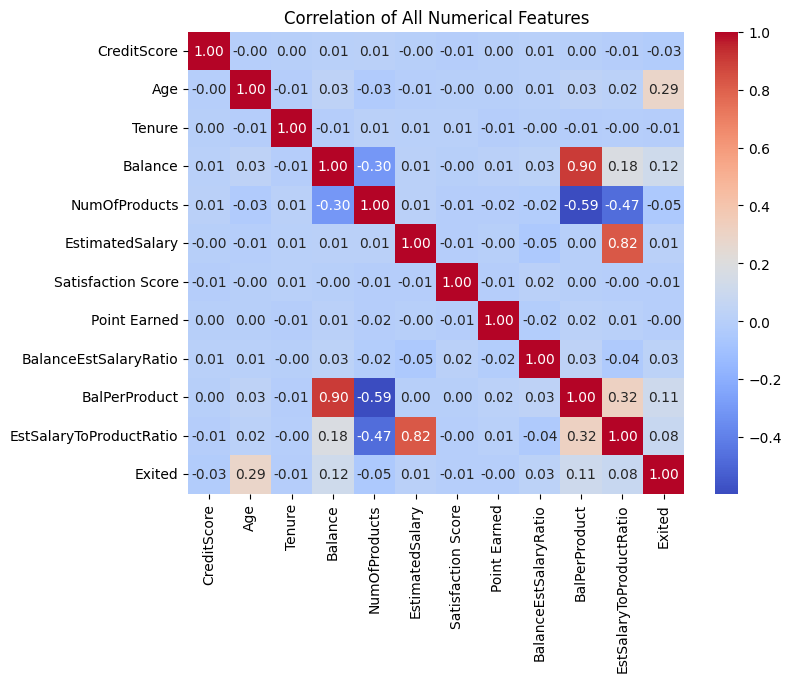

In [89]:
# Look at the correlation of all numerical features with Target Variable 'Exited'

# numericcols refers to columns with data type of int64, float64

# excluding 'HasCrCard', 'IsActiveMember', 'Complain' which will be looked at as binary features

# also excluding 'CustomerId' 

numfeatures = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Satisfaction Score', 'Point Earned']
addnumfeatures = ['BalanceEstSalaryRatio', 'BalPerProduct', 'EstSalaryToProductRatio'] # Added feature from 'Balance', 'EstimatedSalary', 'NumOfProducts'

numericcols = numfeatures + addnumfeatures

numericcols_with_exited = numericcols + ['Exited']

plt.figure(figsize=(8, 6))
sns.heatmap(bank_customer_info[numericcols_with_exited].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation of All Numerical Features")
plt.show()

In [90]:
# Explore the relationship between all categorical features and the Target Variable 'Exited'

# catcols refers to columns with data type of object, category

# including binary features 'HasCrCard', 'IsActiveMember', 'Complain'

catfeatures = ['Geography', 'Gender', 'Card Type']
bifeatures = ['HasCrCard', 'IsActiveMember', 'Complain']
addcatfeatures = ['CreditScoreCategory', 'HasBalance', 'AgeCategory', 'TenureCategory'] # Added features

catcols = catfeatures + bifeatures + addcatfeatures

# Using the Chi-Square Test to see if there is a statistically significant association

def chi_square_test(bank_customer_info, feature, target='Exited'):
    contingency_table = pd.crosstab(bank_customer_info[feature], bank_customer_info[target]) # Create a contingency table

    chi2, p, dof, expected = chi2_contingency(contingency_table) # Run the chi-square test
    
    return {
        'feature': feature,
        'chi2_stat': chi2,
        'p_value': p
    }

chi_results = [] # Store results

for col in catcols:
    result = chi_square_test(bank_customer_info, col)
    chi_results.append(result)

chi_results_df = pd.DataFrame(chi_results) # Convert results to DataFrame
chi_results_df = chi_results_df.sort_values('p_value')  # Sort by significance

print(chi_results_df) # Display results

               feature    chi2_stat        p_value
5             Complain  9907.907036   0.000000e+00
8          AgeCategory  1319.539190  6.379354e-282
0            Geography   300.626401   5.245736e-66
4       IsActiveMember   243.694802   6.153167e-55
7           HasBalance   149.483580   2.248216e-34
1               Gender   112.396554   2.925368e-26
6  CreditScoreCategory     8.744703   3.288502e-02
2            Card Type     5.053223   1.679411e-01
9       TenureCategory     1.536159   4.639031e-01
3            HasCrCard     0.449404   5.026182e-01


#### Findings  

Features (Financial):  

**‘CreditScore’** shows a weak and slightly inverse relationship with a coorelation of -0.03. We would typically expect customers with higher credit scores to be more financially stable and thus less likely to leave the bank. Interestingly, customers with mid-to-high credit scores seem to exit more than those with lower scores. A higher credit scores also have a lower number of customers staying with the bank. This suggests that credit score alone may not be a strong predictor of attrition.  

**‘Balance’** with a coorelation of 0.12 with attrition. There is a notable portion of customers who stay with the bank have a 0 balance. This could indicate that some customers retain their accounts without actively using them and hence a minimal engagement.  

**‘EstimatedSalary’** shows a normally distributed salary and it does not correlate strongly with attrition – 0.03. To gain deeper insight, a new feature is engineered - **’ BalanceEstSalaryRatio’** which provide an estimation for how much of their money the customers keep in the bank. It compares the customer’s current account balance to their estimated annual salary. High ratio (>1) suggest active engagement where customers may trust the bank or keeps a large portion of their money in the bank. Low ratio could indicate disengagement where the customer may be planning to exit or using another bank as their primary one. Very high ratios with low salary may also imply retirees or customers living off savings which may suggest other behavior for attrition.  

**’Card Type’** appears to have little impact on customer attrition. P_value ~ 1.68 tells that feature is not statistically significant. It shows that the number of customers who hold each card type is equally distributed and the attrition rates are also similar across these groups.  

Features (Demographic):  

**’Geography’** shows a meaningful impact on attrition. Although France has the highest number of customers, the attrition rate is significantly higher in Germany. This suggests regional factors may influence customer satisfaction or loyalty. A closer review of services or policies in different regions is recommended.  

**’Gender’** provide insights that female customers exhibit a higher attrition rate even though the bank has more male customers.  

**’AgeCategory’** is a strong key factor for attrition prediction. From the analysis, it shows that customers aged 40-49 have the highest attrition rates. Most customers between the age of 40-49 have mid to high credit scores which suggest that they may be more financially stable and less likely to leave the bank. However, they are also seen to be more likely to leave. The bank may need to develop targeted products or engagement strategies for this demographic to improve retention.  

Features (Behavioral):  

**’Tenure’** is less of a strong factor. It is as expected that newer customers tend to exit more often.  

**’IsActiveMember’** is an important key factor for attrition prediction. Active customers who frequently make more transactions are engaged with the bank and tend to stay longer.  

**‘Satisfaction Score’** appears to have a normal distribution which should not be the case. Assuming the scale ranges from 1 as very dissatisfied to 5 as very satisfied, we would expect to see a skewed distribution towards the right, with more customers giving 4-5 rating. However, it is seen that there are many low rating of 1 as well. This flag customer dissatisfaction. The bank should probably look into this to engage the customers. Improving customer satisfaction could significantly reduce attrition.  

### Data Preprocessing

Numerical Features:  

`CreditScore`, `Balance`, `EstimatedSalary`, `Point Earned`, `Age`, `Tenure`, `BalanceEstSalaryRatio`, `BalPerProduct`, `EstSalaryToProductRatio`  

We will group 'NumOfProducts', 'Satisfaction Score' as a categorical feature: 
- It is a discrete count instead of continuous.
- Each count represents different profiles 

Categorical Features:  

1. Ordered categories: `NumOfProducts`, `Satisfaction Score`, `CreditScoreCategory`, `AgeCategory`, `TenureCategory` (already encoded with sensible numeric values) 
2. Unordered categories: `Card Type` (needs dummy encoding), `Geography` (needs dummy encoding), `Gender` (needs dummy encoding), `HasCrCard` (already dummy encoded), `IsActiveMember` (already dummy encoded), `Complain` (already dummy encoded), `HasBalance` (already dummy encoded)

In [91]:
# Data type for 'NumOfProducts', 'Satisfaction Score' is int64 

# Convert the data type 

# Define the order 

NumOfProducts = CategoricalDtype(categories=[1, 2, 3, 4], ordered=True)
SatisfactionScore = CategoricalDtype(categories=[1, 2, 3, 4, 5], ordered=True)

# Apply the order

bank_customer_info['NumOfProducts'] = bank_customer_info['NumOfProducts'].astype(NumOfProducts)
bank_customer_info['Satisfaction Score'] = bank_customer_info['Satisfaction Score'].astype(SatisfactionScore)

# Print the data type again

bank_customer_info.dtypes

CustomerId                    int64
CreditScore                   int64
Geography                    object
Gender                       object
Age                           int64
Tenure                        int64
Balance                     float64
NumOfProducts              category
HasCrCard                    object
IsActiveMember               object
EstimatedSalary             float64
Exited                        int64
Complain                     object
Satisfaction Score         category
Card Type                    object
Point Earned                  int64
CreditScoreCategory        category
HasBalance                   object
BalanceEstSalaryRatio       float64
AgeCategory                category
TenureCategory             category
BalPerProduct               float64
EstSalaryToProductRatio     float64
dtype: object

In [92]:
# To convert categorical features to a dummy (one-hot encoded) representation

# To find the most frequent category per categorical feature in bank_customer_info to understand which column to drop later  

needs_dummy_encoding = ['Card Type', 'Geography', 'Gender'] 

for col in needs_dummy_encoding:
    most_common = bank_customer_info[col].value_counts().idxmax()
    print(f"{col}: {most_common}")

Card Type: DIAMOND
Geography: France
Gender: Male


In [93]:
# Create dummy variables using get_dummies from pandas 

# Also drop one dummy per category to avoid the dummy variable trap of perfect multicollinearity in linear models

bank_customer_info_dummies = pd.get_dummies(bank_customer_info, columns=needs_dummy_encoding, drop_first=False) 
# Use drop_first=False to control what to drop
# It is typical to drop the most frequent category / the category containing the most values 
# As it is often a natural baseline/reference group 
# Manually drop the dummy columns corresponding to the most common categories

to_drop = [
    'Card Type_DIAMOND', 
    'Geography_France', 
    'Gender_Male'
]

bank_customer_info_dummies = bank_customer_info_dummies.drop(columns=to_drop)

# Inspect the DataFrame of dummies

bank_customer_info_dummies.sample(5)

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,...,AgeCategory,TenureCategory,BalPerProduct,EstSalaryToProductRatio,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER,Geography_Germany,Geography_Spain,Gender_Female
3918,15578787,850,29,1,0.00,2,0,0,152996.89,0,...,1,1,0.00,76498.445,True,False,False,False,False,False
9644,15714240,452,35,8,0.00,2,1,1,149614.81,0,...,2,3,0.00,74807.405,False,True,False,False,False,True
1208,15729804,697,47,6,128252.66,1,1,1,168053.40,0,...,3,2,128252.66,168053.400,False,False,False,False,False,True
6431,15809772,540,39,1,0.00,1,0,1,108419.41,0,...,2,1,0.00,108419.410,False,False,False,False,True,False
6187,15719302,704,36,3,114370.41,1,0,1,66810.48,0,...,2,2,114370.41,66810.480,False,True,False,False,False,False


In [94]:
# Print the data type of the dummies DataFrame

bank_customer_info_dummies.dtypes

CustomerId                    int64
CreditScore                   int64
Age                           int64
Tenure                        int64
Balance                     float64
NumOfProducts              category
HasCrCard                    object
IsActiveMember               object
EstimatedSalary             float64
Exited                        int64
Complain                     object
Satisfaction Score         category
Point Earned                  int64
CreditScoreCategory        category
HasBalance                   object
BalanceEstSalaryRatio       float64
AgeCategory                category
TenureCategory             category
BalPerProduct               float64
EstSalaryToProductRatio     float64
Card Type_GOLD                 bool
Card Type_PLATINUM             bool
Card Type_SILVER               bool
Geography_Germany              bool
Geography_Spain                bool
Gender_Female                  bool
dtype: object

### Model Training 

Null Accuracy is the accuracy that can be achieved by always predicting the most frequent class. It predicts everything that is in the majority class.  

In this case, as 79.6% of the data is class 0 - Retention, a model that always predict 0 would get 79.6% accuracy. It did not catch class 1 - Attrition.  

With the dataset having imbalanced class, it is not a reliable performance baseline on its own.  

We will use baseline model and evaluate metrics like recall and f1-score as the benchmark for imbalanced datasets.  

Recall shows whether it is catching the minority class. Precision looks at how many of the minority class are catched correctly.  

F1 Score is the harmonic mean of precision and recall. It focus on how well the model handles the minority class. Both false positives and false negatives matter.

#### Baseline Model 

In [95]:
# Define a function to train and evaluate the baseline model 

def run_model(bank_customer_info_dummies, feature_list, target='Exited', model=None):
    
    # Split selected Features and Target Variable 
    
    X = bank_customer_info_dummies[feature_list]
    y = bank_customer_info_dummies[target]

    # Split X and y into training and testing sets and using random_state for reproducibility
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    # Use stratify=y to maintain the same attrition proportion of samples of each target class
    # It ensures that the distribution of 0 and 1 in 'Exited' is preserved in both train and test sets

    # Scale numeric features to ensure that all synthetic data is in the same scale 
    
    numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
    scaler = StandardScaler()
    X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
    X_test[numeric_cols] = scaler.transform(X_test[numeric_cols]) # To apply the exact same transformation to test data that was applied to training data
    
    # Train the baseline model using the training data set 

    if model is None:
        model = LogisticRegression(random_state=42, class_weight='balanced')

    # Training or fitting the baseline model

    model.fit(X_train, y_train)

    # Test the baseline model on the testing set 
    
    y_pred = model.predict(X_test)

    # Evaluate the baseline model 
    
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

    return model

In [96]:
# Baseline features

feature_list = ['Age', 'Tenure', 'IsActiveMember',
                'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'HasCrCard']

print("Model 1 - LogisticRegression:")
model = run_model(bank_customer_info_dummies, feature_list)

Model 1 - LogisticRegression:
Accuracy: 0.71
Confusion Matrix:
 [[1129  463]
 [ 117  291]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.71      0.80      1592
           1       0.39      0.71      0.50       408

    accuracy                           0.71      2000
   macro avg       0.65      0.71      0.65      2000
weighted avg       0.80      0.71      0.74      2000



In [97]:
# Select features

feature_list2 = ['Age', 'Tenure', 'IsActiveMember', 
                'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'NumOfProducts', 'Balance', 'BalPerProduct', 
                 'Satisfaction Score', 'BalanceEstSalaryRatio', 'EstimatedSalary', 'CreditScoreCategory']

print("Model 2 - LogisticRegression:")
model = run_model(bank_customer_info_dummies, feature_list2)

Model 2 - LogisticRegression:
Accuracy: 0.712
Confusion Matrix:
 [[1132  460]
 [ 116  292]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.71      0.80      1592
           1       0.39      0.72      0.50       408

    accuracy                           0.71      2000
   macro avg       0.65      0.71      0.65      2000
weighted avg       0.80      0.71      0.74      2000



#### Other Models

In [98]:
# Using the same selected features in feature_list2

# Re-train the model using another classifier

model_2 = RandomForestClassifier(random_state=42, class_weight='balanced')

print("Model 2 - RandomForestClassifier:")
run_model(bank_customer_info_dummies, feature_list2, model=model_2)

Model 2 - RandomForestClassifier:
Accuracy: 0.8625
Confusion Matrix:
 [[1540   52]
 [ 223  185]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.97      0.92      1592
           1       0.78      0.45      0.57       408

    accuracy                           0.86      2000
   macro avg       0.83      0.71      0.75      2000
weighted avg       0.85      0.86      0.85      2000



RandomForestClassifier(class_weight='balanced', random_state=42)

In [99]:
# Using the same selected features in feature_list2 and train the model using RandomForestClassifier

# Split selected Features and Target Variable 

X = bank_customer_info_dummies[feature_list2]
y = bank_customer_info_dummies['Exited']

# Split X and y 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale numeric features

numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

# And define parameters for tuning

params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': ['balanced']
}

# GridSearch and train the model

grid = GridSearchCV(RandomForestClassifier(random_state=42), params, scoring='f1', cv=5)

# Fit the model

grid.fit(X_train, y_train)

# Re-trained model from tuning

re_model = grid.best_estimator_

In [100]:
# Evaluate 

print("Re-trained Model 2 - RandomForestClassifier:")
run_model(bank_customer_info_dummies, feature_list2, model=re_model)

Re-trained Model 2 - RandomForestClassifier:
Accuracy: 0.8385
Confusion Matrix:
 [[1402  190]
 [ 133  275]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.88      0.90      1592
           1       0.59      0.67      0.63       408

    accuracy                           0.84      2000
   macro avg       0.75      0.78      0.76      2000
weighted avg       0.85      0.84      0.84      2000



RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=2, min_samples_split=5,
                       random_state=42)

In [101]:
# Create new Features to improve the model performance 

# Based on 'Balance' and 'IsActiveMember'

bank_customer_info_dummies['ActiveBalance'] = bank_customer_info_dummies['Balance'] * bank_customer_info_dummies['IsActiveMember'].astype(int)

Features (Added): 

| name | description |
| ---    | --- |
| ActiveBalance | "ActiveBalance" capture active customers with high balances. 

In [102]:
# Add new features  

feature_list3 = ['Age', 'Tenure', 'IsActiveMember', 
                'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'NumOfProducts', 'Balance', 'BalPerProduct', 
                 'Satisfaction Score', 'BalanceEstSalaryRatio', 'EstimatedSalary', 'CreditScoreCategory', 
                 'EstSalaryToProductRatio', 'ActiveBalance']

# Now using the features in feature_list3 and re-train the model using RandomForestClassifier

# Split selected Features and Target Variable 

X = bank_customer_info_dummies[feature_list3]
y = bank_customer_info_dummies['Exited']

# Split X and y 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale numeric features

numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

# Amend parameters for tuning

param_dist = {
    'n_estimators': randint(100, 300), # Try a slightly larger forest
    'max_depth': [10, 15, 20, None], # Add `None` to let trees grow fully
    'min_samples_split': randint(2, 7), # Higher values reduce overfitting
    'min_samples_leaf': randint(1, 5), # Larger leaves for generalization
    'max_features': ['sqrt', 'log2', None], # Control number of features at each split
    'bootstrap': [True, False], # Explore bootstrapping behavior
    'class_weight': ['balanced'] # Still needed for imbalance
}

# RandomizedSearch instead of GridSearch

random_search = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=30,  # Try 30 combinations instead of 648
    scoring='f1',
    cv=5,
    random_state=42,
    n_jobs=-1
)

# Fit the model

random_search.fit(X_train, y_train)

# Final model from tuning

final_model = random_search.best_estimator_

In [103]:
# Evaluate 

print("Final-trained Model 2 - RandomForestClassifier:")
run_model(bank_customer_info_dummies, feature_list3, model=final_model)

Final-trained Model 2 - RandomForestClassifier:
Accuracy: 0.8365
Confusion Matrix:
 [[1388  204]
 [ 123  285]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.87      0.89      1592
           1       0.58      0.70      0.64       408

    accuracy                           0.84      2000
   macro avg       0.75      0.79      0.77      2000
weighted avg       0.85      0.84      0.84      2000



RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=4, min_samples_split=4,
                       n_estimators=185, random_state=42)

Analysis: 

`Class 0 - Retention`, `Class 1 - Attrition`  

The bank would want to predict customers who are at risk of leaving. So, in the customer attrition analysis, it is important to focus on the minority class and customers who exit are typically rare but valuable to catch.  

The final model using Random Forest after tuning with parameters demonstrated a better performance at identifying the minority class.  

Recall = 0.70 means that it identifies 70% of customers who have exited which is catching most of the customers who leave.  

On the other hand, Precision on customers who have exited = 0.58 which means it might be wrongly flagging customers who did not exit as someone who is likely to exit (high false positives).  

Although it could potentially waste retention efforts/costs, the goal for the bank is also to take proactive measures to keep customer engaged to improve customer satisfaction and reduce attrition. The lower precision score at falsely labeling loyal customers is not as crucial.  

Hence, we will use this model as it is more important for the bank to successfully catch as many customers who are exiting as possible (higher recall) in advance. 

### Insights & Recommendations 

Key factors that contribute to customer attrition include 'Age', 'Tenure', 'IsActiveMember', 'Geography, 'Gender, 'NumOfProducts', 'Balance', 'BalPerProduct', 'Satisfaction Score', 'BalanceEstSalaryRatio', 'EstimatedSalary', 'CreditScoreCategory', 'EstSalaryToProductRatio', 'ActiveBalance'.  

To reduce attrition, the bank could take the following measures that can help improve retention:  

1. Develop targeted retention strategies for customers aged 40–49 - These customers may have higher expectations or are more likely to seek better offers from competitors. The bank could tailored financial products, or personalized relationship management for this age group.
2. Focus on customer engagement - ‘IsActiveMember’ feature is a strong predictor of retention and inactive customers are more likely to exit. It suggests that that could be a lack of connection with the bank or the customers are using another institution as their primary bank. They can introduce usage-based incentives such as rewards for transactions.
3. The satisfaction score shows an unusual distribution with many low scores present. The bank could look into enhancing customer satisfaction such as having post-interaction surveys on low-score customers to understand if there are unmet expectations or service issues that are not being addressed.
4. Address attrition risk in specific regions like Germany as it shows a higher attrition rate as compared to other two countries with smaller proportion of the customer base. The bank could conduct a region-specific review of policies, services, and customer experience.  

### Conclusion 

By focusing on age, activity level, satisfaction and regional behavior, the bank can proactively identify at-risk customers and implement targeted retention strategies. This data-backed approach ensures resources are allocated efficiently to reduce attrition, improve satisfaction, and ultimately, strengthen long-term customer loyalty.

In [104]:
# Export the data as a new DataFrame and to show model to 100% of the customers for Dashboard

# Prepare full dataset without splitting but using the selected features and add 'CustomerId' back 

X_full = bank_customer_info_dummies[feature_list3 + ['CustomerId']]

# Save 'CustomerId'

customer_ids = X_full['CustomerId']

# Drop it temporarily for model prediction

X_full_model = X_full.drop(columns=['CustomerId'])

# Add predictions and probabilities from the final model on full dataset

y_full_pred = final_model.predict(X_full_model)
y_full_prob = final_model.predict_proba(X_full_model)[:, 1] # Probability of attrition (class 1)

# To create export DataFrame

export_full_df = X_full_model.copy()
export_full_df['CustomerId'] = customer_ids.values
export_full_df['Predicted_Attrition'] = y_full_pred
export_full_df['Attrition_Probability'] = y_full_prob

In [105]:
print(export_full_df['Gender_Female'].value_counts(dropna=False)) 
# It is counting the number of Female values so where 'Gender_Female' is True  

Gender_Female
False    5457
True     4543
Name: count, dtype: int64


In [106]:
# Recreate 'Gender'  

if 'Gender_Female' in export_full_df.columns:
    export_full_df['Gender'] = export_full_df['Gender_Female'].map({True: 'Female', False: 'Male'})
else:
    export_full_df['Gender'] = 'Unknown' 

# Recreate readable 'Geography' column

def decode_geography(row):
    if 'Geography_Germany' in row and row['Geography_Germany'] == 1:
        return 'Germany'
    elif 'Geography_Spain' in row and row['Geography_Spain'] == 1:
        return 'Spain'
    else:
        return 'France'  # Baseline dummy

export_full_df['Geography'] = export_full_df.apply(decode_geography, axis=1)

# Drop the dummy columns

export_full_df.drop(columns=['Gender_Female', 'Geography_Germany', 'Geography_Spain'], inplace=True, errors='ignore')

In [107]:
# Merge 'Exited' column from original dataset to display overview metrics in Dashboard

attrition_labels = bank_customer_info[['CustomerId', 'Exited']]
export_full_df = export_full_df.merge(attrition_labels, on='CustomerId', how='left')

In [108]:
# Export to CSV 

export_full_df.to_csv('Bank-Customer-Attrition-Insights-Data-Cleaned-Full.csv', index=False)

### End of Analysis